In [1]:
import graphviz 
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise_update.pkl')

In [3]:
df.columns

Index(['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2',
       'gvtec2_dt', 'state_day', 'state_night', 'state_dawn', 'vm1', 'vd1',
       'vm2', 'vd2', 'gvtec1_dt_lag_9', 'gvtec2_dt_lag_20', 'vtec_dt_lag_3',
       's4'],
      dtype='object')

In [4]:
original = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
tempo  = ['state_day', 'state_night', 'state_dawn']
mdv1 = ['vm1', 'vd1']
mdv2 = ['vm2', 'vd2']
lag = ['gvtec1_dt_lag_9', 'gvtec2_dt_lag_20']

In [5]:
def generate_and_avaliate_model(df, instances_set, target, file_to_save_model=None, model=None):
    if not model:
        # generate model, use k-fold crossvalidation and print scores
        model = RandomForestRegressor()
        
    scaler = StandardScaler()
    scaler.fit(X=df[instances_set].values) 
    X = scaler.transform(X=df[instances_set].values)
    y = df['s4'].values
    
    size = len(X)
    last_element = size - size//10
    

    X_train, X_test, y_train, y_test = train_test_split(X[0:last_element], y[0:last_element], test_size=0.30, random_state=42)
    index = df.index.values[last_element:size+1]
                
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    
    # generate final model, and avaliate a test set
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    give_error(y_test, y_predict);
    print()

    # use the final model to avaliate the error in a sample of the time series
    df_aux = pd.DataFrame(index=index)
    df_aux['predito'] = model.predict(X[last_element:size+1])
    df_aux['real'] = y[last_element:size+1]

    print('Error for the time series sample:')
    give_error(df_aux['real'].values, df_aux['predito'].values);

    # plot the time series predict against the real values
    ax = df_aux.plot(figsize=(18, 8));
    plt.xlabel('UT')

    lat, long = location_station('sj2')
    set_of_sunrise = find_set_sunrise(df_aux, lat, long)
    set_of_sunset = find_set_sunset(df_aux, lat, long)
    for i in set_of_sunrise:
        ax.axvline(x=i, color='y')
    for i in set_of_sunset[0:-1]:
        ax.axvline(x=i, color='r')

    plt.tight_layout()
    if file_to_save_model:
        plt.savefig(file_to_save_model, format='eps', dpi=1000)
    else:
        plt.show()

O erro quadrático médio foi: 0.000931
O erro quadrático total foi: 1.783188
O maior erro por previsão foi: 0.290701
O erro relativo foi: 7.099215%
O número de verdadeiros negativos foi: 2801
O número de verdadeiros positivos foi: 310
O número de falsos negativos foi: 65
O número de falsos positivos foi: 238
O POD foi: 0.826667
O FAR foi: 0.434307
A ACC foi: 0.911248
O kappa foi: 0.021951

Error for the time series sample:
O erro quadrático médio foi: 0.004315
O erro quadrático total foi: 2.335285
O maior erro por previsão foi: 0.443388
O erro relativo foi: 15.124479%
O número de verdadeiros negativos foi: 918
O número de verdadeiros positivos foi: 119
O número de falsos negativos foi: 34
O número de falsos positivos foi: 193
O POD foi: 0.777778
O FAR foi: 0.618590
A ACC foi: 0.820411
O kappa foi: 0.033911


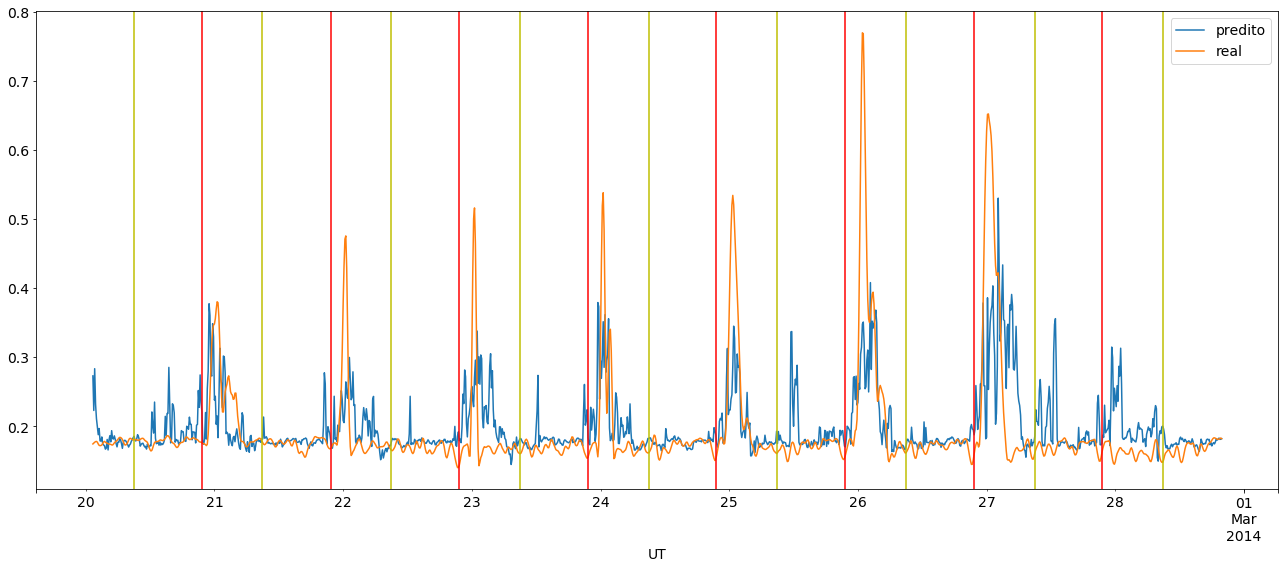

In [6]:
generate_and_avaliate_model(df, original, 's4')

O erro quadrático médio foi: 0.001244
O erro quadrático total foi: 2.060812
O maior erro por previsão foi: 0.295540
O erro relativo foi: 8.688354%
O número de verdadeiros negativos foi: 2740
O número de verdadeiros positivos foi: 250
O número de falsos negativos foi: 125
O número de falsos positivos foi: 299
O POD foi: 0.666667
O FAR foi: 0.544627
A ACC foi: 0.875806
O kappa foi: 0.035799

Error for the time series sample:
O erro quadrático médio foi: 0.004469
O erro quadrático total foi: 2.376639
O maior erro por previsão foi: 0.429930
O erro relativo foi: 18.203142%
O número de verdadeiros negativos foi: 815
O número de verdadeiros positivos foi: 123
O número de falsos negativos foi: 30
O número de falsos positivos foi: 296
O POD foi: 0.803922
O FAR foi: 0.706444
A ACC foi: 0.742089
O kappa foi: 0.038091


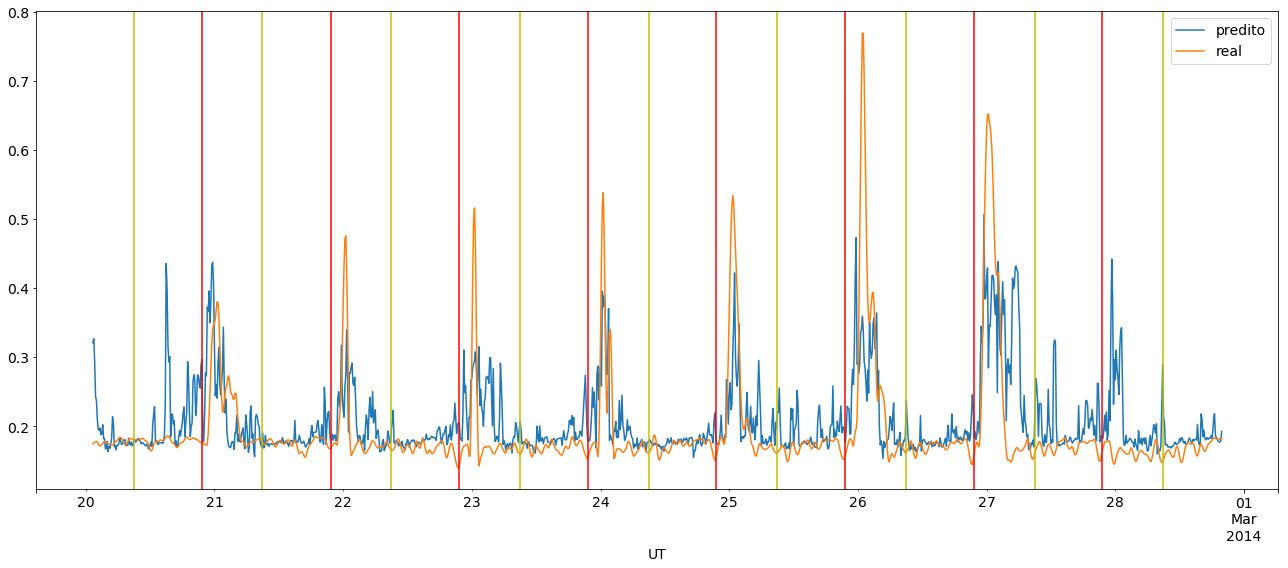

In [7]:
generate_and_avaliate_model(df, ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'], 's4')

O erro quadrático médio foi: 0.000927
O erro quadrático total foi: 1.778876
O maior erro por previsão foi: 0.270155
O erro relativo foi: 7.470468%
O número de verdadeiros negativos foi: 2812
O número de verdadeiros positivos foi: 285
O número de falsos negativos foi: 90
O número de falsos positivos foi: 227
O POD foi: 0.760000
O FAR foi: 0.443359
A ACC foi: 0.907147
O kappa foi: 0.027264

Error for the time series sample:
O erro quadrático médio foi: 0.004083
O erro quadrático total foi: 2.271630
O maior erro por previsão foi: 0.478077
O erro relativo foi: 15.160902%
O número de verdadeiros negativos foi: 910
O número de verdadeiros positivos foi: 123
O número de falsos negativos foi: 30
O número de falsos positivos foi: 201
O POD foi: 0.803922
O FAR foi: 0.620370
A ACC foi: 0.817247
O kappa foi: 0.032561


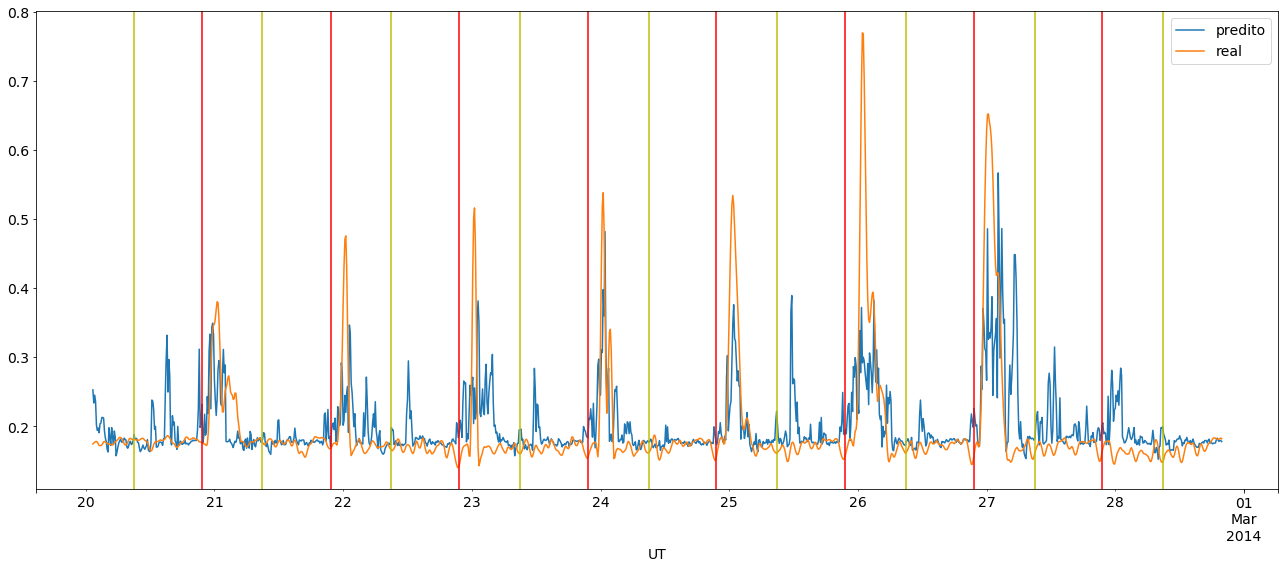

In [8]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'], 's4')

O erro quadrático médio foi: 0.000945
O erro quadrático total foi: 1.795895
O maior erro por previsão foi: 0.319935
O erro relativo foi: 7.209641%
O número de verdadeiros negativos foi: 2792
O número de verdadeiros positivos foi: 304
O número de falsos negativos foi: 71
O número de falsos positivos foi: 247
O POD foi: 0.810667
O FAR foi: 0.448276
A ACC foi: 0.906854
O kappa foi: 0.023450

Error for the time series sample:
O erro quadrático médio foi: 0.004124
O erro quadrático total foi: 2.283048
O maior erro por previsão foi: 0.411307
O erro relativo foi: 14.994211%
O número de verdadeiros negativos foi: 887
O número de verdadeiros positivos foi: 125
O número de falsos negativos foi: 28
O número de falsos positivos foi: 224
O POD foi: 0.816993
O FAR foi: 0.641834
A ACC foi: 0.800633
O kappa foi: 0.033070


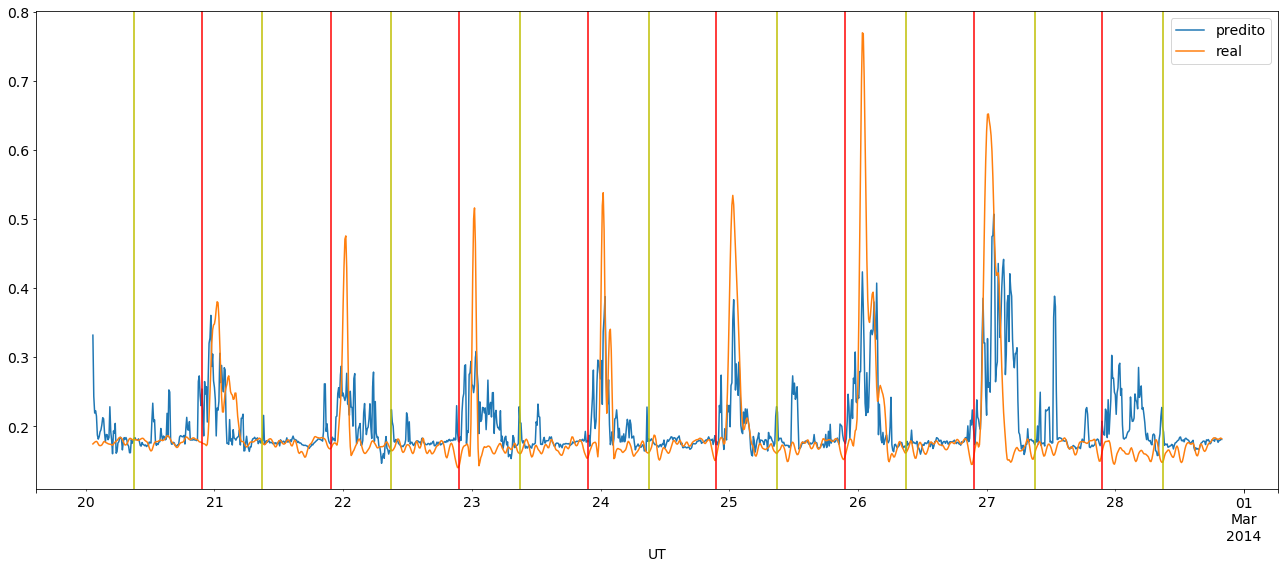

In [9]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'], 's4')

O erro quadrático médio foi: 0.001030
O erro quadrático total foi: 1.875215
O maior erro por previsão foi: 0.330034
O erro relativo foi: 7.520883%
O número de verdadeiros negativos foi: 2768
O número de verdadeiros positivos foi: 295
O número de falsos negativos foi: 80
O número de falsos positivos foi: 271
O POD foi: 0.786667
O FAR foi: 0.478799
A ACC foi: 0.897188
O kappa foi: 0.025858

Error for the time series sample:
O erro quadrático médio foi: 0.004601
O erro quadrático total foi: 2.411505
O maior erro por previsão foi: 0.513369
O erro relativo foi: 16.286780%
O número de verdadeiros negativos foi: 877
O número de verdadeiros positivos foi: 129
O número de falsos negativos foi: 24
O número de falsos positivos foi: 234
O POD foi: 0.843137
O FAR foi: 0.644628
A ACC foi: 0.795886
O kappa foi: 0.032067


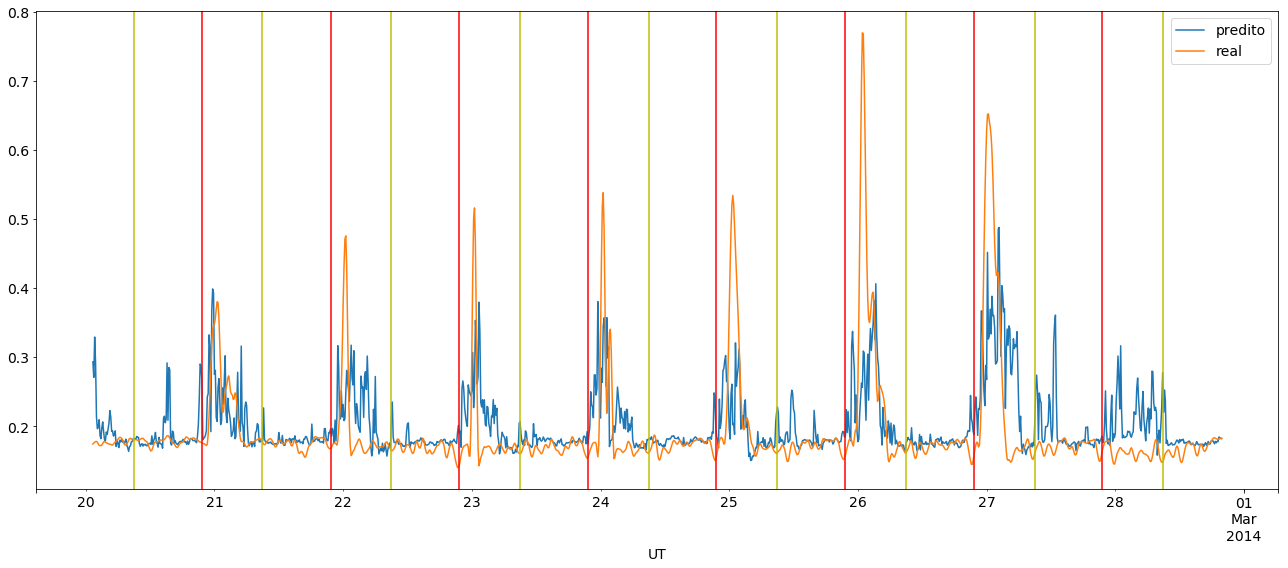

In [10]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'], 's4')

O erro quadrático médio foi: 0.001063
O erro quadrático total foi: 1.905141
O maior erro por previsão foi: 0.337597
O erro relativo foi: 7.336977%
O número de verdadeiros negativos foi: 2803
O número de verdadeiros positivos foi: 298
O número de falsos negativos foi: 77
O número de falsos positivos foi: 236
O POD foi: 0.794667
O FAR foi: 0.441948
A ACC foi: 0.908319
O kappa foi: 0.024552

Error for the time series sample:
O erro quadrático médio foi: 0.004667
O erro quadrático total foi: 2.428697
O maior erro por previsão foi: 0.490140
O erro relativo foi: 15.341813%
O número de verdadeiros negativos foi: 888
O número de verdadeiros positivos foi: 124
O número de falsos negativos foi: 29
O número de falsos positivos foi: 223
O POD foi: 0.810458
O FAR foi: 0.642651
A ACC foi: 0.800633
O kappa foi: 0.033426


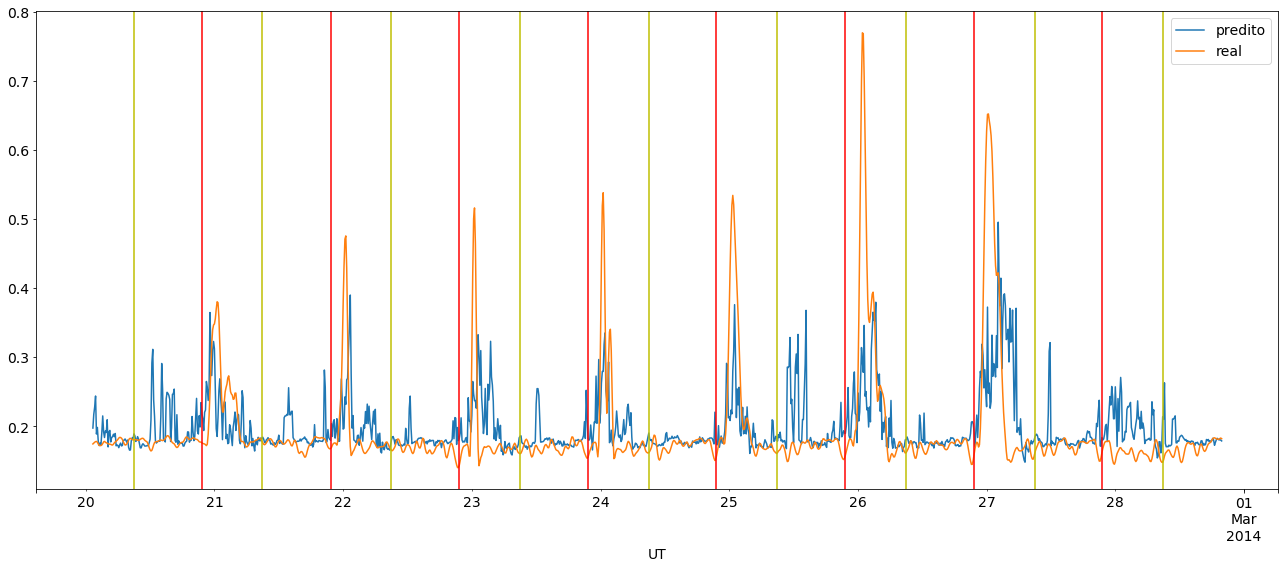

In [11]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt'], 's4')

O erro quadrático médio foi: 0.001207
O erro quadrático total foi: 2.029797
O maior erro por previsão foi: 0.373234
O erro relativo foi: 7.919482%
O número de verdadeiros negativos foi: 2777
O número de verdadeiros positivos foi: 280
O número de falsos negativos foi: 95
O número de falsos positivos foi: 262
O POD foi: 0.746667
O FAR foi: 0.483395
A ACC foi: 0.895431
O kappa foi: 0.028929

Error for the time series sample:
O erro quadrático médio foi: 0.004384
O erro quadrático total foi: 2.353964
O maior erro por previsão foi: 0.434711
O erro relativo foi: 16.518172%
O número de verdadeiros negativos foi: 854
O número de verdadeiros positivos foi: 129
O número de falsos negativos foi: 24
O número de falsos positivos foi: 257
O POD foi: 0.843137
O FAR foi: 0.665803
A ACC foi: 0.777690
O kappa foi: 0.033579


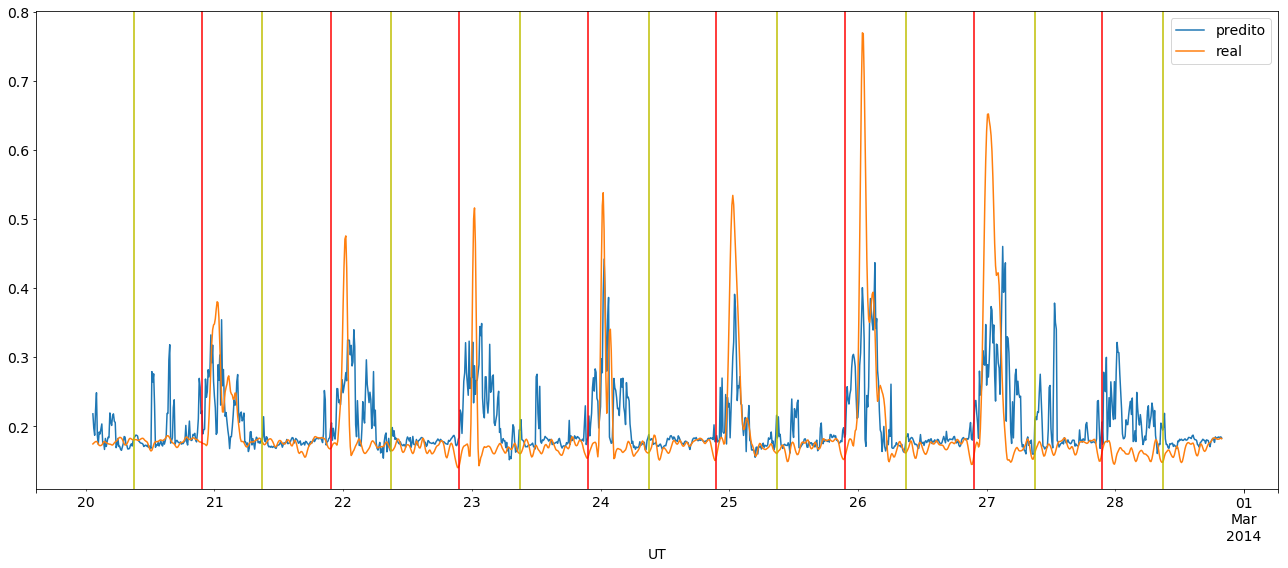

In [12]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt'], 's4')

O erro quadrático médio foi: 0.001047
O erro quadrático total foi: 1.890586
O maior erro por previsão foi: 0.293490
O erro relativo foi: 7.460832%
O número de verdadeiros negativos foi: 2795
O número de verdadeiros positivos foi: 288
O número de falsos negativos foi: 87
O número de falsos positivos foi: 244
O POD foi: 0.768000
O FAR foi: 0.458647
A ACC foi: 0.903046
O kappa foi: 0.026892

Error for the time series sample:
O erro quadrático médio foi: 0.004522
O erro quadrático total foi: 2.390697
O maior erro por previsão foi: 0.535133
O erro relativo foi: 13.967178%
O número de verdadeiros negativos foi: 941
O número de verdadeiros positivos foi: 122
O número de falsos negativos foi: 31
O número de falsos positivos foi: 170
O POD foi: 0.797386
O FAR foi: 0.582192
A ACC foi: 0.840981
O kappa foi: 0.031239


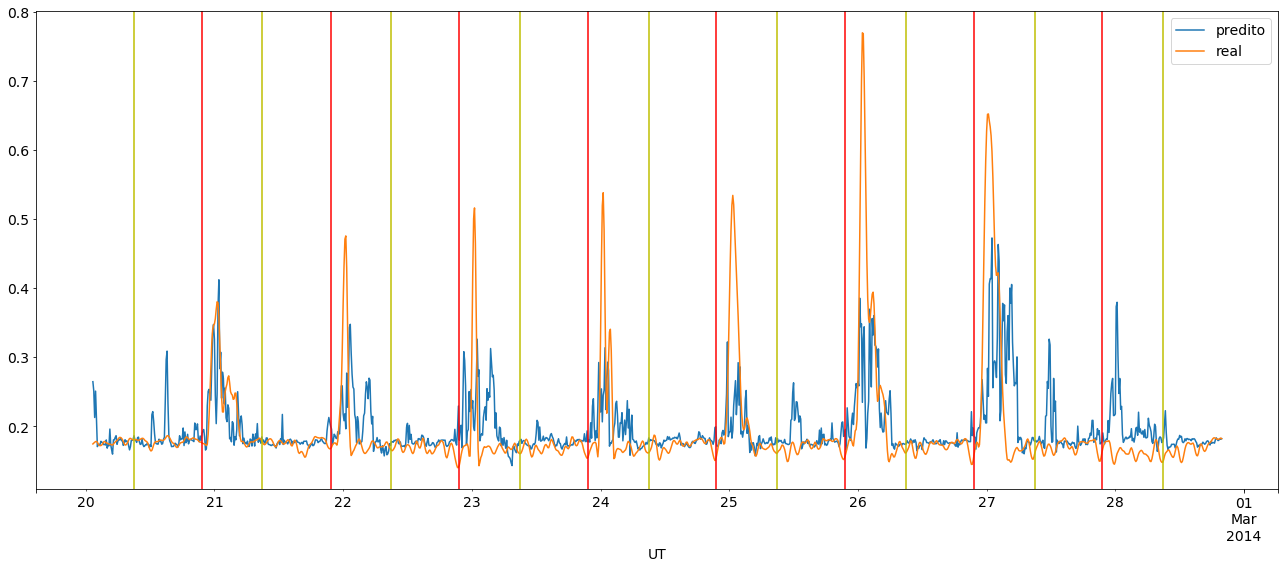

In [13]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2'], 's4')

O erro quadrático médio foi: 0.002896
O erro quadrático total foi: 3.144486
O maior erro por previsão foi: 0.405317
O erro relativo foi: 12.816877%
O número de verdadeiros negativos foi: 2622
O número de verdadeiros positivos foi: 132
O número de falsos negativos foi: 243
O número de falsos positivos foi: 417
O POD foi: 0.352000
O FAR foi: 0.759563
A ACC foi: 0.806678
O kappa foi: 0.059388

Error for the time series sample:
O erro quadrático médio foi: 0.006486
O erro quadrático total foi: 2.863246
O maior erro por previsão foi: 0.590593
O erro relativo foi: 14.749228%
O número de verdadeiros negativos foi: 991
O número de verdadeiros positivos foi: 41
O número de falsos negativos foi: 112
O número de falsos positivos foi: 120
O POD foi: 0.267974
O FAR foi: 0.745342
A ACC foi: 0.816456
O kappa foi: 0.072549


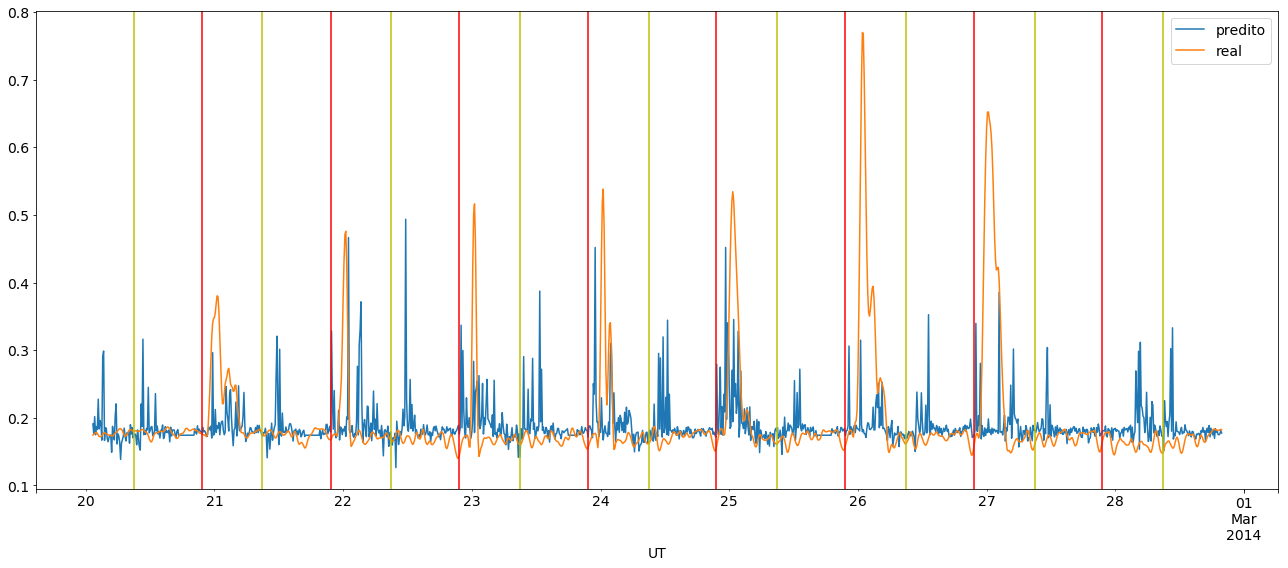

In [14]:
generate_and_avaliate_model(df, ['vtec',], 's4')

O erro quadrático médio foi: 0.001682
O erro quadrático total foi: 2.396494
O maior erro por previsão foi: 0.401087
O erro relativo foi: 9.611847%
O número de verdadeiros negativos foi: 2684
O número de verdadeiros positivos foi: 244
O número de falsos negativos foi: 131
O número de falsos positivos foi: 355
O POD foi: 0.650667
O FAR foi: 0.592654
A ACC foi: 0.857645
O kappa foi: 0.037598

Error for the time series sample:
O erro quadrático médio foi: 0.005037
O erro quadrático total foi: 2.523353
O maior erro por previsão foi: 0.521274
O erro relativo foi: 14.978217%
O número de verdadeiros negativos foi: 927
O número de verdadeiros positivos foi: 111
O número de falsos negativos foi: 42
O número de falsos positivos foi: 184
O POD foi: 0.725490
O FAR foi: 0.623729
A ACC foi: 0.821203
O kappa foi: 0.037152


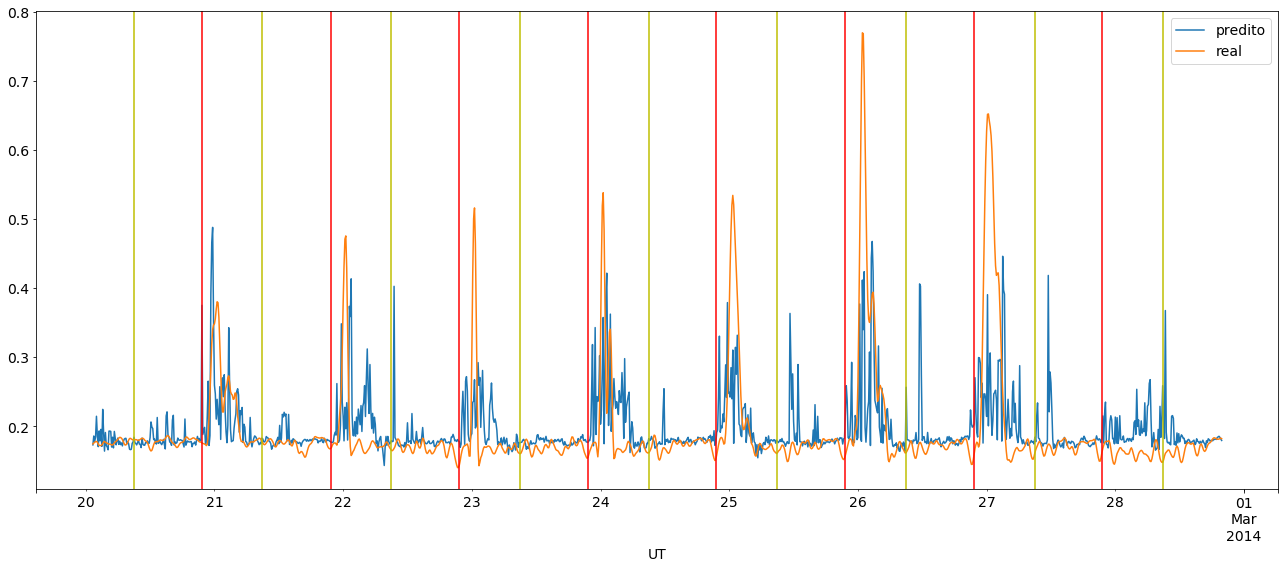

In [15]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2'], 's4')

O erro quadrático médio foi: 0.001561
O erro quadrático total foi: 2.308524
O maior erro por previsão foi: 0.390598
O erro relativo foi: 9.194126%
O número de verdadeiros negativos foi: 2726
O número de verdadeiros positivos foi: 250
O número de falsos negativos foi: 125
O número de falsos positivos foi: 313
O POD foi: 0.666667
O FAR foi: 0.555950
A ACC foi: 0.871705
O kappa foi: 0.035949

Error for the time series sample:
O erro quadrático médio foi: 0.005629
O erro quadrático total foi: 2.667433
O maior erro por previsão foi: 0.572111
O erro relativo foi: 14.392043%
O número de verdadeiros negativos foi: 955
O número de verdadeiros positivos foi: 93
O número de falsos negativos foi: 60
O número de falsos positivos foi: 156
O POD foi: 0.607843
O FAR foi: 0.626506
A ACC foi: 0.829114
O kappa foi: 0.044945


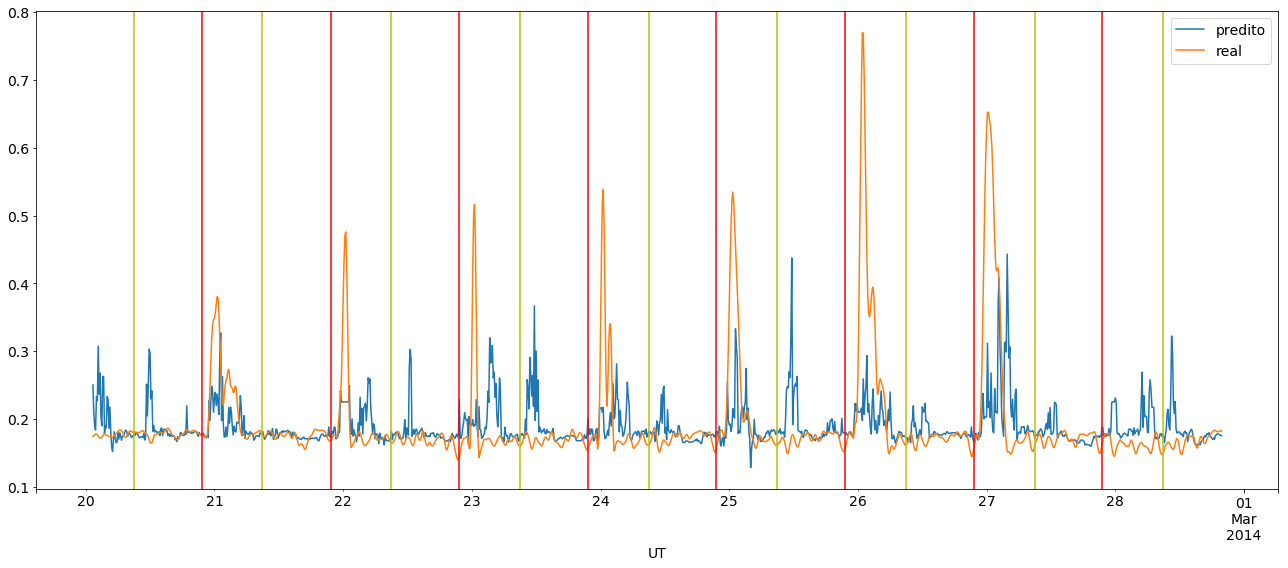

In [16]:
generate_and_avaliate_model(df, ['vtec', 'gvtec1', 'gvtec2'], 's4')

O erro quadrático médio foi: 0.001225
O erro quadrático total foi: 2.045046
O maior erro por previsão foi: 0.340070
O erro relativo foi: 8.098097%
O número de verdadeiros negativos foi: 2746
O número de verdadeiros positivos foi: 285
O número de falsos negativos foi: 90
O número de falsos positivos foi: 293
O POD foi: 0.760000
O FAR foi: 0.506920
A ACC foi: 0.887815
O kappa foi: 0.028368

Error for the time series sample:
O erro quadrático médio foi: 0.004376
O erro quadrático total foi: 2.351925
O maior erro por previsão foi: 0.404179
O erro relativo foi: 15.443173%
O número de verdadeiros negativos foi: 890
O número de verdadeiros positivos foi: 131
O número de falsos negativos foi: 22
O número de falsos positivos foi: 221
O POD foi: 0.856209
O FAR foi: 0.627841
A ACC foi: 0.807753
O kappa foi: 0.030376


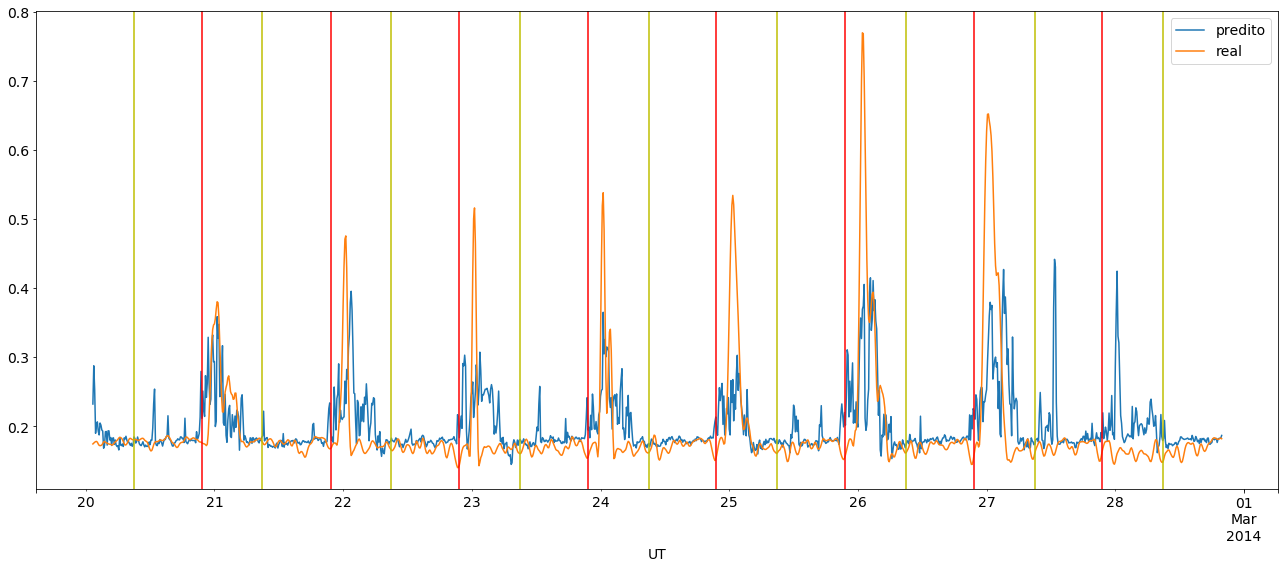

In [17]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt'], 's4')

O erro quadrático médio foi: 0.000888
O erro quadrático total foi: 1.741266
O maior erro por previsão foi: 0.340115
O erro relativo foi: 6.719047%
O número de verdadeiros negativos foi: 2832
O número de verdadeiros positivos foi: 308
O número de falsos negativos foi: 67
O número de falsos positivos foi: 207
O POD foi: 0.821333
O FAR foi: 0.401942
A ACC foi: 0.919742
O kappa foi: 0.021750

Error for the time series sample:
O erro quadrático médio foi: 0.003912
O erro quadrático total foi: 2.223727
O maior erro por previsão foi: 0.478899
O erro relativo foi: 15.767112%
O número de verdadeiros negativos foi: 855
O número de verdadeiros positivos foi: 127
O número de falsos negativos foi: 26
O número de falsos positivos foi: 256
O POD foi: 0.830065
O FAR foi: 0.668407
A ACC foi: 0.776899
O kappa foi: 0.034263


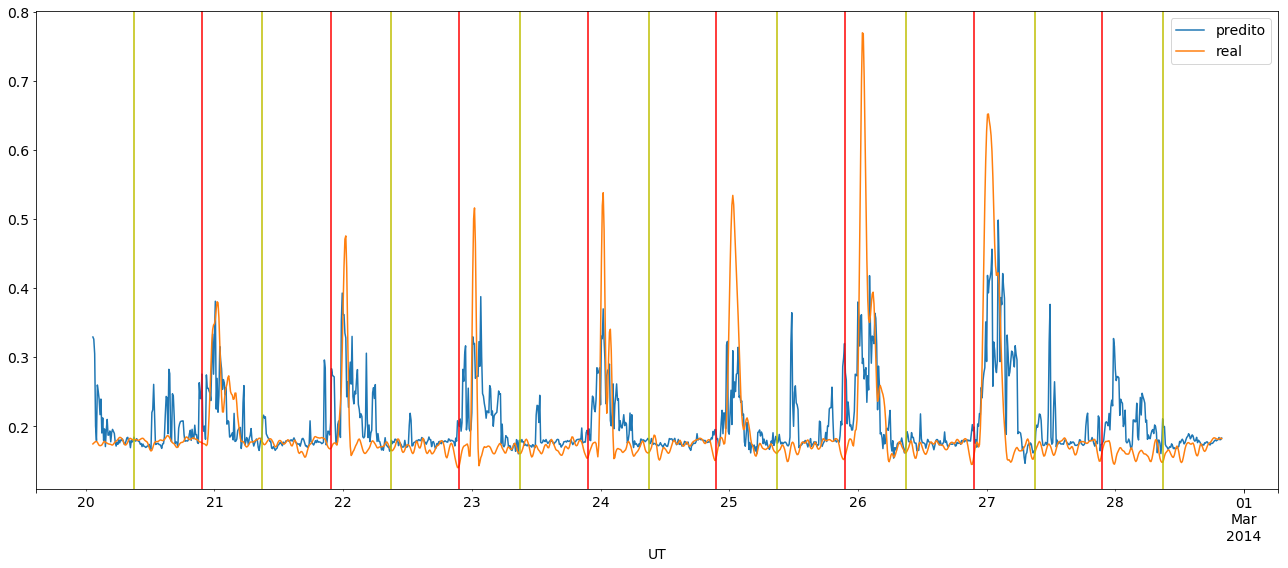

In [18]:
generate_and_avaliate_model(df, original + lag, 's4')

O erro quadrático médio foi: 0.000919
O erro quadrático total foi: 1.771398
O maior erro por previsão foi: 0.368198
O erro relativo foi: 6.888011%
O número de verdadeiros negativos foi: 2822
O número de verdadeiros positivos foi: 307
O número de falsos negativos foi: 68
O número de falsos positivos foi: 217
O POD foi: 0.818667
O FAR foi: 0.414122
A ACC foi: 0.916520
O kappa foi: 0.022180

Error for the time series sample:
O erro quadrático médio foi: 0.003953
O erro quadrático total foi: 2.235189
O maior erro por previsão foi: 0.417257
O erro relativo foi: 14.792763%
O número de verdadeiros negativos foi: 897
O número de verdadeiros positivos foi: 134
O número de falsos negativos foi: 19
O número de falsos positivos foi: 214
O POD foi: 0.875817
O FAR foi: 0.614943
A ACC foi: 0.815665
O kappa foi: 0.028616


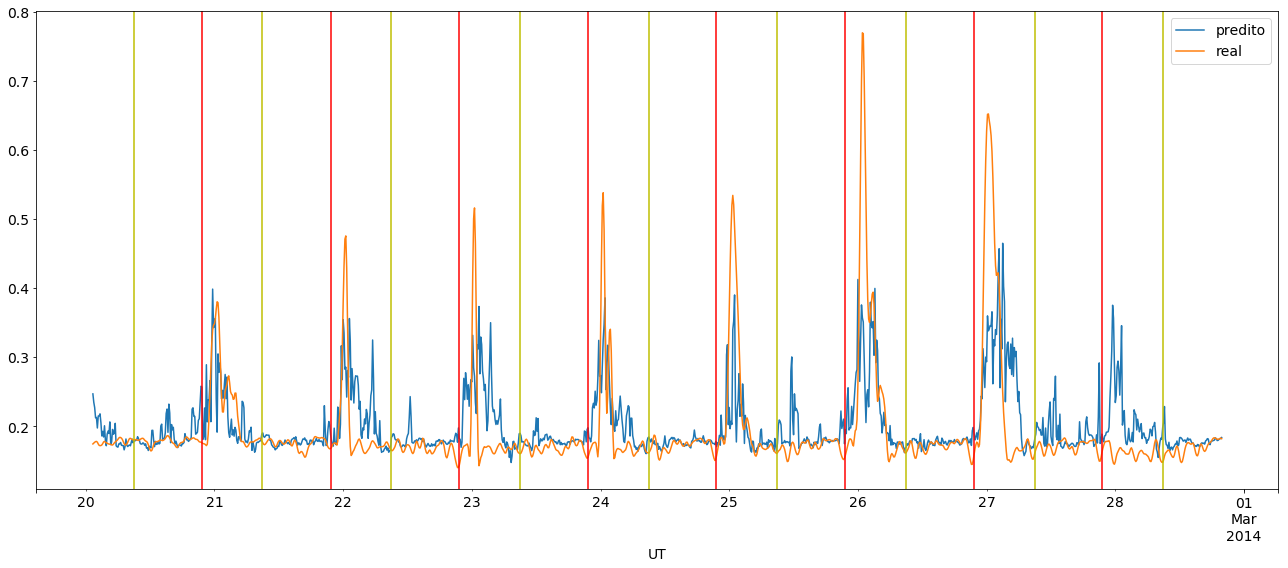

In [19]:
generate_and_avaliate_model(df, original + ['gvtec1_dt_lag_9',], 's4')

O erro quadrático médio foi: 0.000866
O erro quadrático total foi: 1.719384
O maior erro por previsão foi: 0.319567
O erro relativo foi: 6.712007%
O número de verdadeiros negativos foi: 2841
O número de verdadeiros positivos foi: 302
O número de falsos negativos foi: 73
O número de falsos positivos foi: 198
O POD foi: 0.805333
O FAR foi: 0.396000
A ACC foi: 0.920621
O kappa foi: 0.022924

Error for the time series sample:
O erro quadrático médio foi: 0.004405
O erro quadrático total foi: 2.359737
O maior erro por previsão foi: 0.420047
O erro relativo foi: 15.429159%
O número de verdadeiros negativos foi: 883
O número de verdadeiros positivos foi: 127
O número de falsos negativos foi: 26
O número de falsos positivos foi: 228
O POD foi: 0.830065
O FAR foi: 0.642254
A ACC foi: 0.799051
O kappa foi: 0.032493


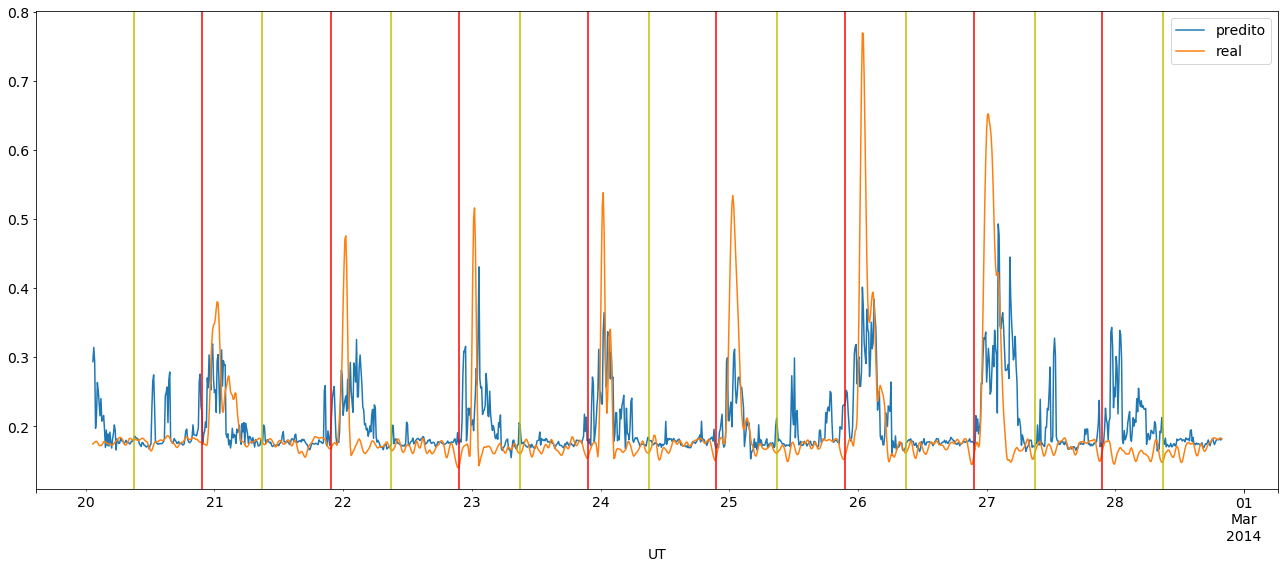

In [20]:
generate_and_avaliate_model(df, original + ['gvtec2_dt_lag_20',], 's4')

O erro quadrático médio foi: 0.000732
O erro quadrático total foi: 1.581130
O maior erro por previsão foi: 0.280403
O erro relativo foi: 5.876427%
O número de verdadeiros negativos foi: 2859
O número de verdadeiros positivos foi: 314
O número de falsos negativos foi: 61
O número de falsos positivos foi: 180
O POD foi: 0.837333
O FAR foi: 0.364372
A ACC foi: 0.929408
O kappa foi: 0.019812

Error for the time series sample:
O erro quadrático médio foi: 0.004572
O erro quadrático total foi: 2.403879
O maior erro por previsão foi: 0.545872
O erro relativo foi: 13.950174%
O número de verdadeiros negativos foi: 936
O número de verdadeiros positivos foi: 111
O número de falsos negativos foi: 42
O número de falsos positivos foi: 175
O POD foi: 0.725490
O FAR foi: 0.611888
A ACC foi: 0.828323
O kappa foi: 0.036764


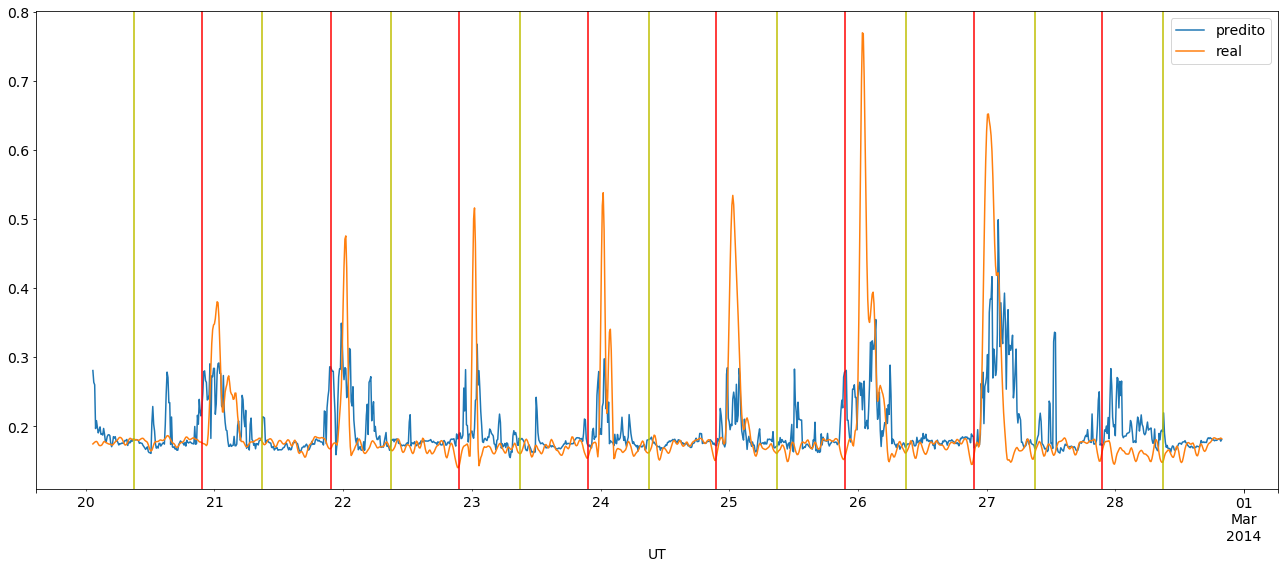

In [21]:
generate_and_avaliate_model(df, original + mdv1, 's4')

O erro quadrático médio foi: 0.000710
O erro quadrático total foi: 1.556476
O maior erro por previsão foi: 0.254865
O erro relativo foi: 6.026954%
O número de verdadeiros negativos foi: 2837
O número de verdadeiros positivos foi: 317
O número de falsos negativos foi: 58
O número de falsos positivos foi: 202
O POD foi: 0.845333
O FAR foi: 0.389210
A ACC foi: 0.923843
O kappa foi: 0.019612

Error for the time series sample:
O erro quadrático médio foi: 0.004845
O erro quadrático total foi: 2.474779
O maior erro por previsão foi: 0.546471
O erro relativo foi: 15.068461%
O número de verdadeiros negativos foi: 905
O número de verdadeiros positivos foi: 110
O número de falsos negativos foi: 43
O número de falsos positivos foi: 206
O POD foi: 0.718954
O FAR foi: 0.651899
A ACC foi: 0.803006
O kappa foi: 0.038540


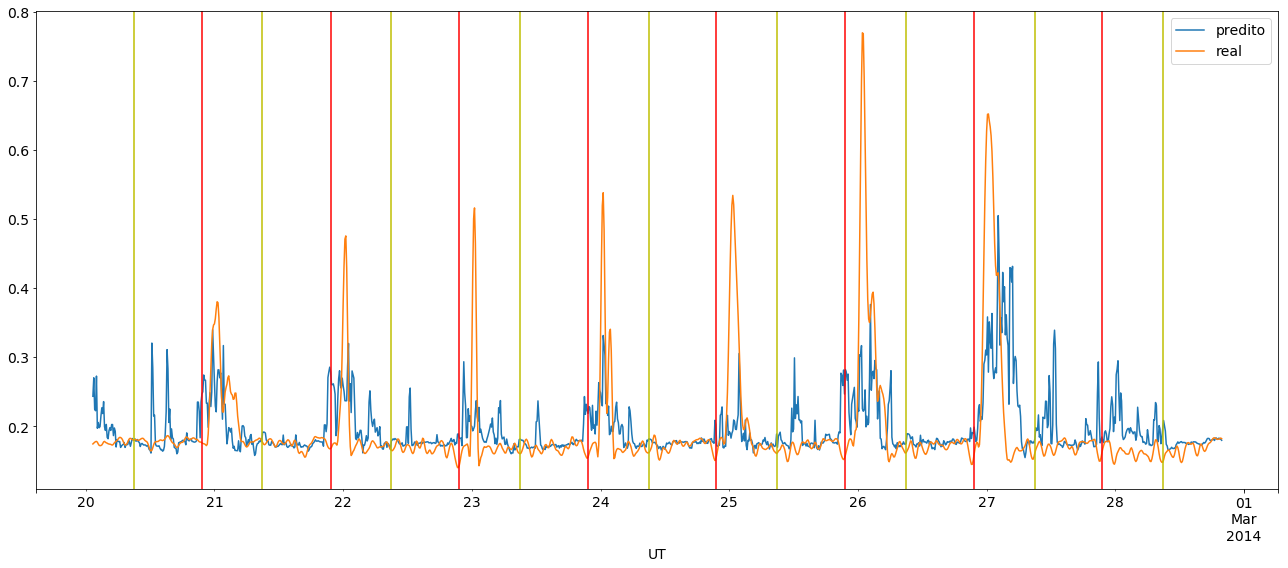

In [22]:
generate_and_avaliate_model(df, original + mdv2, 's4')

O erro quadrático médio foi: 0.000771
O erro quadrático total foi: 1.622446
O maior erro por previsão foi: 0.337573
O erro relativo foi: 6.374930%
O número de verdadeiros negativos foi: 2859
O número de verdadeiros positivos foi: 317
O número de falsos negativos foi: 58
O número de falsos positivos foi: 180
O POD foi: 0.845333
O FAR foi: 0.362173
A ACC foi: 0.930287
O kappa foi: 0.019123

Error for the time series sample:
O erro quadrático médio foi: 0.003586
O erro quadrático total foi: 2.128978
O maior erro por previsão foi: 0.467548
O erro relativo foi: 14.286043%
O número de verdadeiros negativos foi: 899
O número de verdadeiros positivos foi: 136
O número de falsos negativos foi: 17
O número de falsos positivos foi: 212
O POD foi: 0.888889
O FAR foi: 0.609195
A ACC foi: 0.818829
O kappa foi: 0.027612


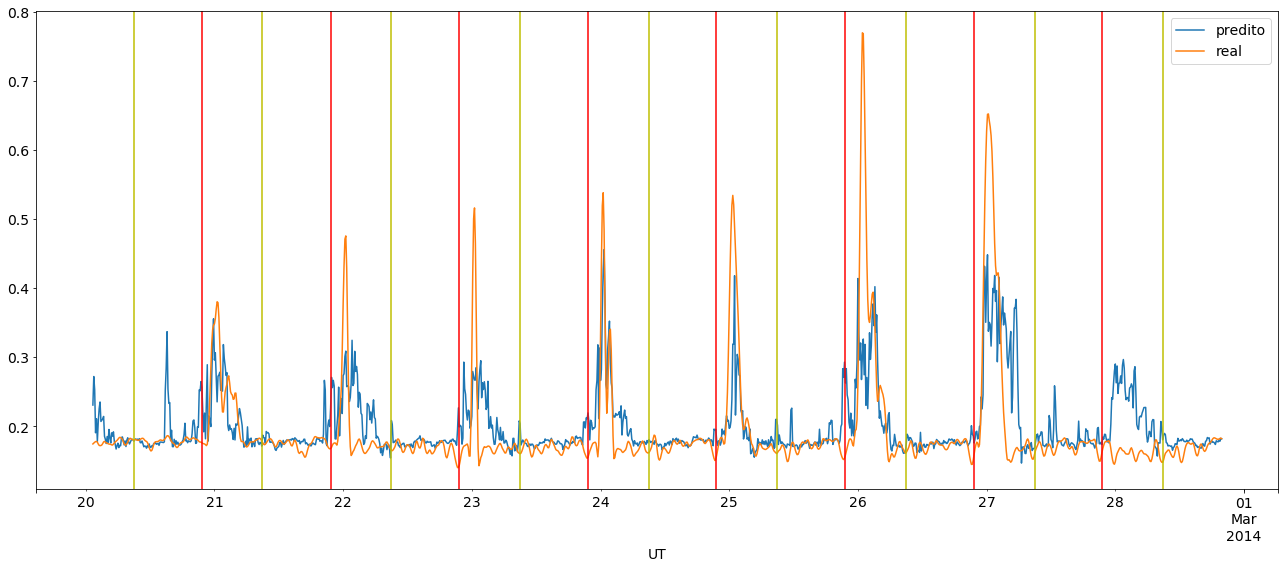

In [23]:
generate_and_avaliate_model(df, original + tempo + lag, 's4')

O erro quadrático médio foi: 0.000610
O erro quadrático total foi: 1.442896
O maior erro por previsão foi: 0.248999
O erro relativo foi: 5.339394%
O número de verdadeiros negativos foi: 2898
O número de verdadeiros positivos foi: 322
O número de falsos negativos foi: 53
O número de falsos positivos foi: 141
O POD foi: 0.858667
O FAR foi: 0.304536
A ACC foi: 0.943175
O kappa foi: 0.017073

Error for the time series sample:
O erro quadrático médio foi: 0.004463
O erro quadrático total foi: 2.375194
O maior erro por previsão foi: 0.524669
O erro relativo foi: 14.110169%
O número de verdadeiros negativos foi: 964
O número de verdadeiros positivos foi: 132
O número de falsos negativos foi: 21
O número de falsos positivos foi: 147
O POD foi: 0.862745
O FAR foi: 0.526882
A ACC foi: 0.867089
O kappa foi: 0.024816


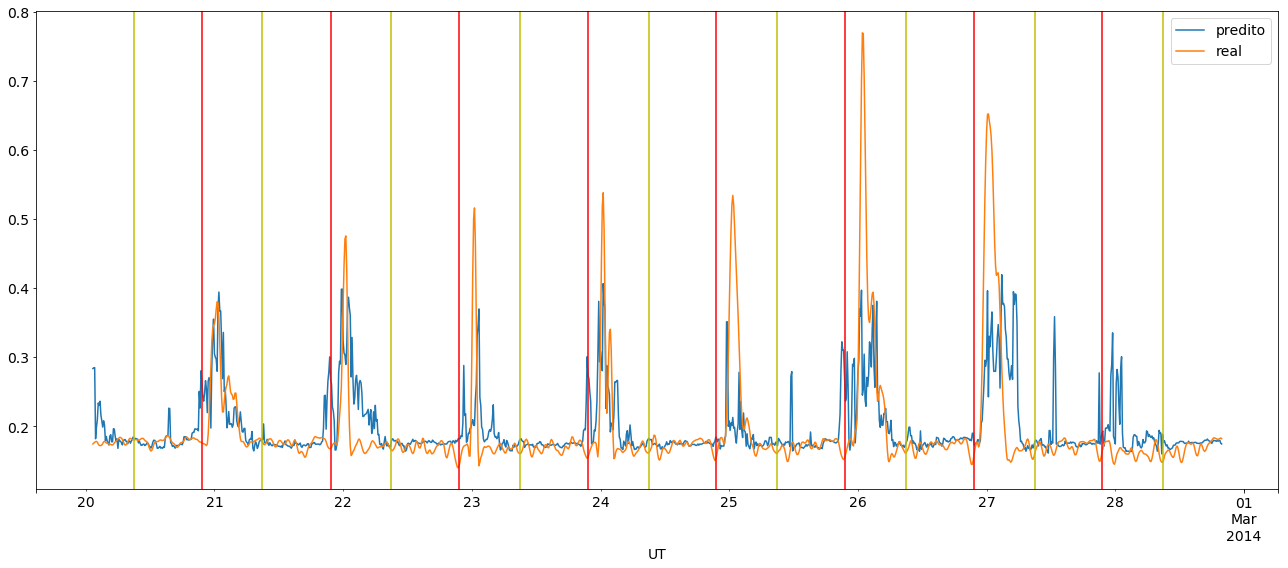

In [24]:
generate_and_avaliate_model(df, original + tempo + mdv2, 's4')

O erro quadrático médio foi: 0.000614
O erro quadrático total foi: 1.448384
O maior erro por previsão foi: 0.251499
O erro relativo foi: 5.367698%
O número de verdadeiros negativos foi: 2890
O número de verdadeiros positivos foi: 314
O número de falsos negativos foi: 61
O número de falsos positivos foi: 149
O POD foi: 0.837333
O FAR foi: 0.321814
A ACC foi: 0.938489
O kappa foi: 0.019139

Error for the time series sample:
O erro quadrático médio foi: 0.004257
O erro quadrático total foi: 2.319713
O maior erro por previsão foi: 0.485512
O erro relativo foi: 14.364606%
O número de verdadeiros negativos foi: 913
O número de verdadeiros positivos foi: 120
O número de falsos negativos foi: 33
O número de falsos positivos foi: 198
O POD foi: 0.784314
O FAR foi: 0.622642
A ACC foi: 0.817247
O kappa foi: 0.033729


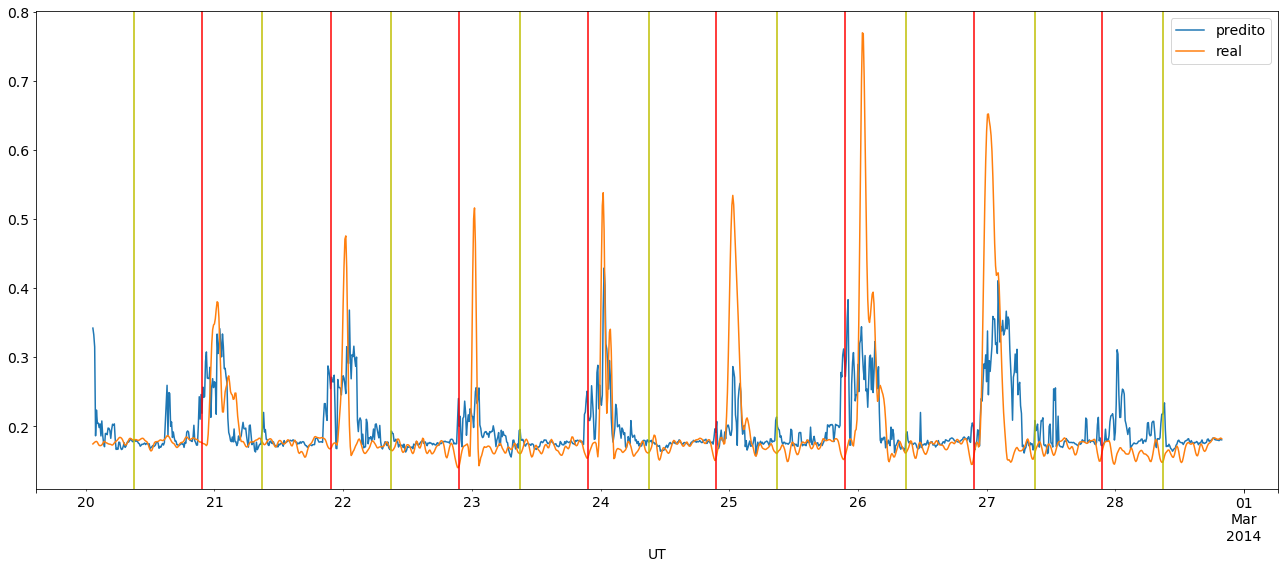

In [25]:
generate_and_avaliate_model(df, original + tempo + mdv2 + lag, 's4')

O erro quadrático médio foi: 0.001638
O erro quadrático total foi: 2.364825
O maior erro por previsão foi: 0.365204
O erro relativo foi: 9.878095%
O número de verdadeiros negativos foi: 2668
O número de verdadeiros positivos foi: 219
O número de falsos negativos foi: 156
O número de falsos positivos foi: 371
O POD foi: 0.584000
O FAR foi: 0.628814
A ACC foi: 0.845636
O kappa foi: 0.042680

Error for the time series sample:
O erro quadrático médio foi: 0.003701
O erro quadrático total foi: 2.162822
O maior erro por previsão foi: 0.436633
O erro relativo foi: 15.477664%
O número de verdadeiros negativos foi: 904
O número de verdadeiros positivos foi: 114
O número de falsos negativos foi: 39
O número de falsos positivos foi: 207
O POD foi: 0.745098
O FAR foi: 0.644860
A ACC foi: 0.805380
O kappa foi: 0.036837


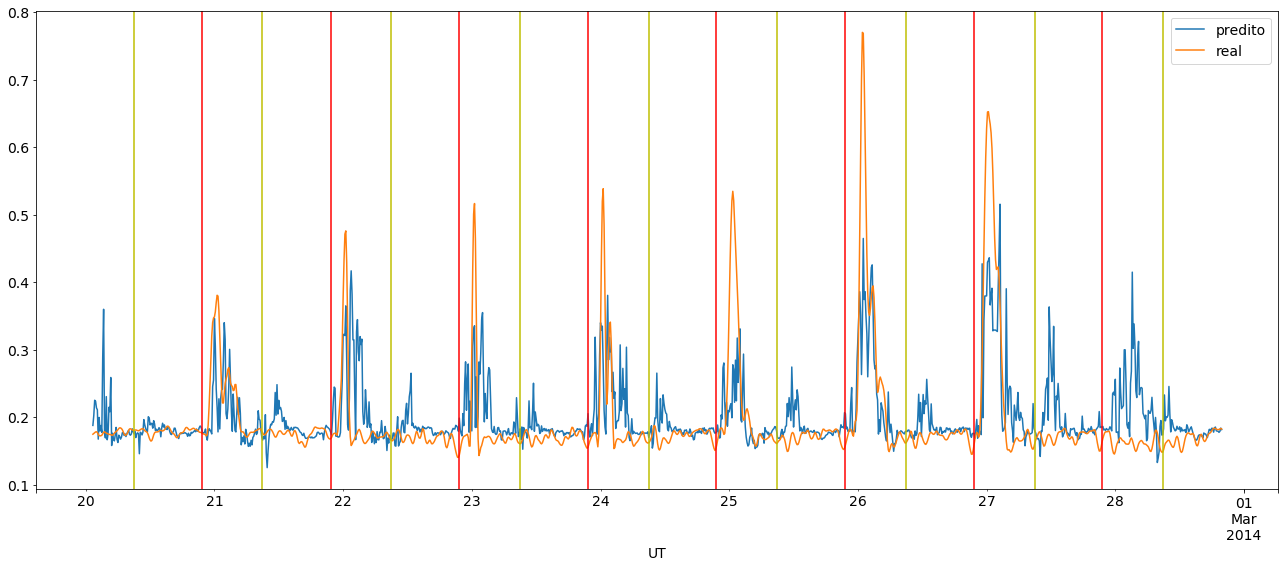

In [26]:
generate_and_avaliate_model(df, ['vtec',] + lag, 's4')

O erro quadrático médio foi: 0.002148
O erro quadrático total foi: 2.708144
O maior erro por previsão foi: 0.394203
O erro relativo foi: 11.357754%
O número de verdadeiros negativos foi: 2600
O número de verdadeiros positivos foi: 163
O número de falsos negativos foi: 212
O número de falsos positivos foi: 439
O POD foi: 0.434667
O FAR foi: 0.729236
A ACC foi: 0.809315
O kappa foi: 0.053431

Error for the time series sample:
O erro quadrático médio foi: 0.004615
O erro quadrático total foi: 2.415112
O maior erro por previsão foi: 0.512697
O erro relativo foi: 16.622932%
O número de verdadeiros negativos foi: 897
O número de verdadeiros positivos foi: 107
O número de falsos negativos foi: 46
O número de falsos positivos foi: 214
O POD foi: 0.699346
O FAR foi: 0.666667
A ACC foi: 0.794304
O kappa foi: 0.040158


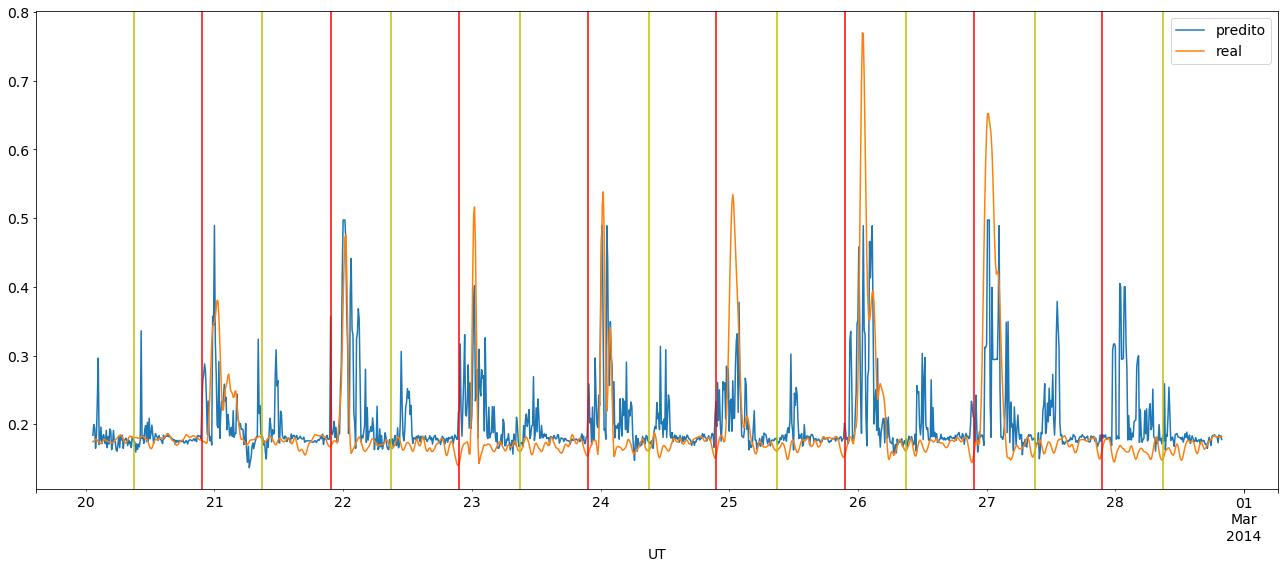

In [27]:
generate_and_avaliate_model(df, ['vtec', 'gvtec1_dt_lag_9'], 's4')

O erro quadrático médio foi: 0.002017
O erro quadrático total foi: 2.624273
O maior erro por previsão foi: 0.404213
O erro relativo foi: 10.961598%
O número de verdadeiros negativos foi: 2621
O número de verdadeiros positivos foi: 193
O número de falsos negativos foi: 182
O número de falsos positivos foi: 418
O POD foi: 0.514667
O FAR foi: 0.684124
A ACC foi: 0.824253
O kappa foi: 0.047849

Error for the time series sample:
O erro quadrático médio foi: 0.004559
O erro quadrático total foi: 2.400587
O maior erro por previsão foi: 0.463362
O erro relativo foi: 14.985777%
O número de verdadeiros negativos foi: 946
O número de verdadeiros positivos foi: 83
O número de falsos negativos foi: 70
O número de falsos positivos foi: 165
O POD foi: 0.542484
O FAR foi: 0.665323
A ACC foi: 0.814082
O kappa foi: 0.050019


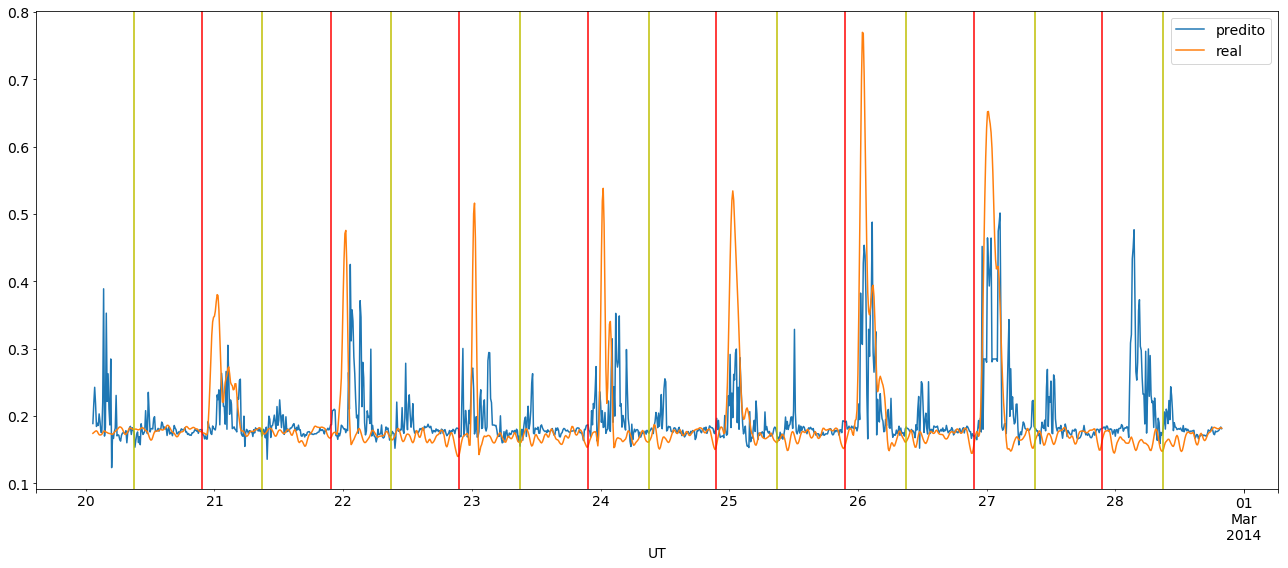

In [28]:
generate_and_avaliate_model(df, ['vtec', 'gvtec2_dt_lag_20'], 's4')

O erro quadrático médio foi: 0.002131
O erro quadrático total foi: 2.697083
O maior erro por previsão foi: 0.417357
O erro relativo foi: 10.411752%
O número de verdadeiros negativos foi: 2801
O número de verdadeiros positivos foi: 220
O número de falsos negativos foi: 155
O número de falsos positivos foi: 238
O POD foi: 0.586667
O FAR foi: 0.519651
A ACC foi: 0.884886
O kappa foi: 0.041742

Error for the time series sample:
O erro quadrático médio foi: 0.005411
O erro quadrático total foi: 2.615258
O maior erro por previsão foi: 0.481712
O erro relativo foi: 16.089256%
O número de verdadeiros negativos foi: 955
O número de verdadeiros positivos foi: 123
O número de falsos negativos foi: 30
O número de falsos positivos foi: 156
O POD foi: 0.803922
O FAR foi: 0.559140
A ACC foi: 0.852848
O kappa foi: 0.029942


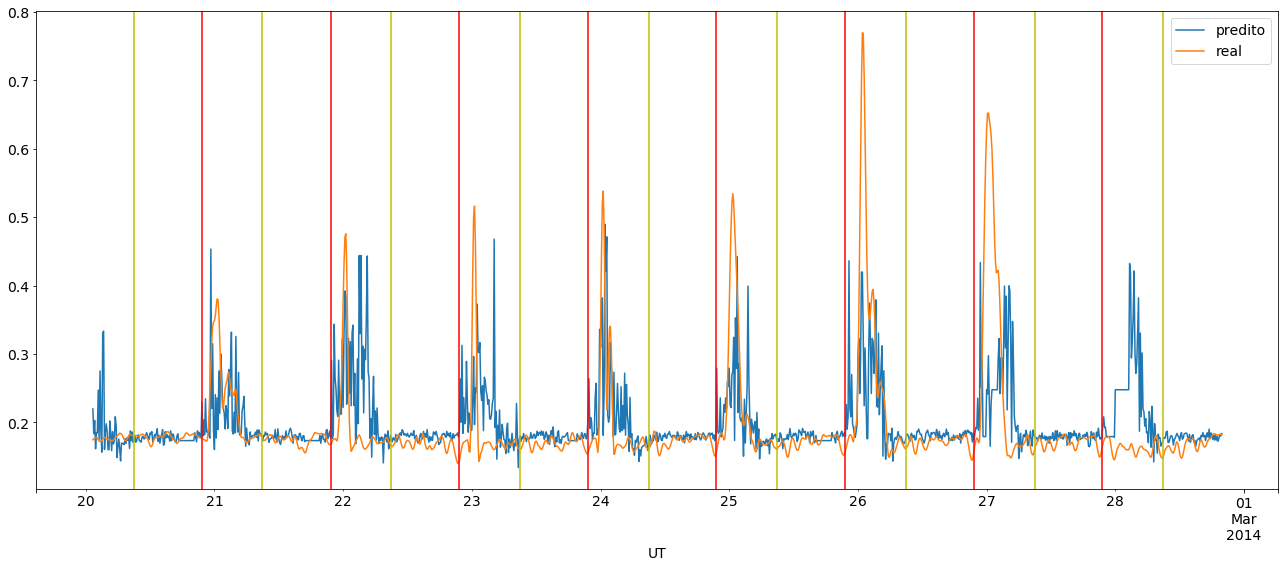

In [29]:
generate_and_avaliate_model(df, ['vtec',] + tempo, 's4')

O erro quadrático médio foi: 0.002150
O erro quadrático total foi: 2.709424
O maior erro por previsão foi: 0.402491
O erro relativo foi: 10.435671%
O número de verdadeiros negativos foi: 2808
O número de verdadeiros positivos foi: 208
O número de falsos negativos foi: 167
O número de falsos positivos foi: 231
O POD foi: 0.554667
O FAR foi: 0.526196
A ACC foi: 0.883421
O kappa foi: 0.044356

Error for the time series sample:
O erro quadrático médio foi: 0.005730
O erro quadrático total foi: 2.691267
O maior erro por previsão foi: 0.536089
O erro relativo foi: 15.803854%
O número de verdadeiros negativos foi: 971
O número de verdadeiros positivos foi: 111
O número de falsos negativos foi: 42
O número de falsos positivos foi: 140
O POD foi: 0.725490
O FAR foi: 0.557769
A ACC foi: 0.856013
O kappa foi: 0.035252


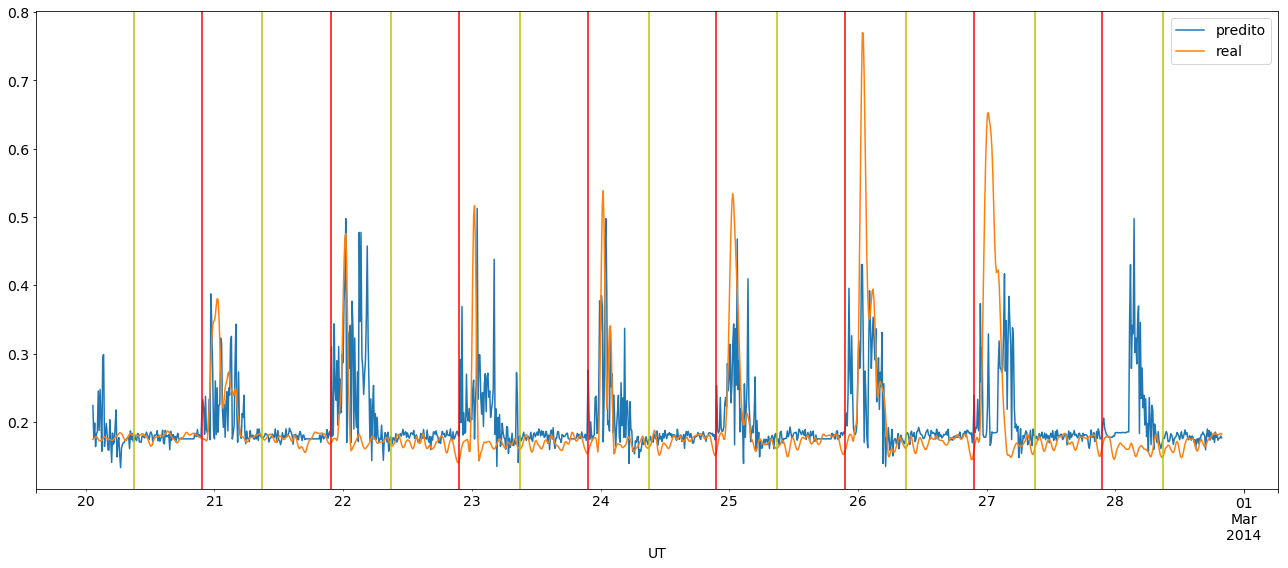

In [30]:
generate_and_avaliate_model(df, ['vtec',] + tempo, 's4')

O erro quadrático médio foi: 0.000918
O erro quadrático total foi: 1.769895
O maior erro por previsão foi: 0.354926
O erro relativo foi: 6.006411%
O número de verdadeiros negativos foi: 2897
O número de verdadeiros positivos foi: 288
O número de falsos negativos foi: 87
O número de falsos positivos foi: 142
O POD foi: 0.768000
O FAR foi: 0.330233
A ACC foi: 0.932923
O kappa foi: 0.025133

Error for the time series sample:
O erro quadrático médio foi: 0.005930
O erro quadrático total foi: 2.737838
O maior erro por previsão foi: 0.596236
O erro relativo foi: 13.652852%
O número de verdadeiros negativos foi: 1028
O número de verdadeiros positivos foi: 84
O número de falsos negativos foi: 69
O número de falsos positivos foi: 83
O POD foi: 0.549020
O FAR foi: 0.497006
A ACC foi: 0.879747
O kappa foi: 0.048760


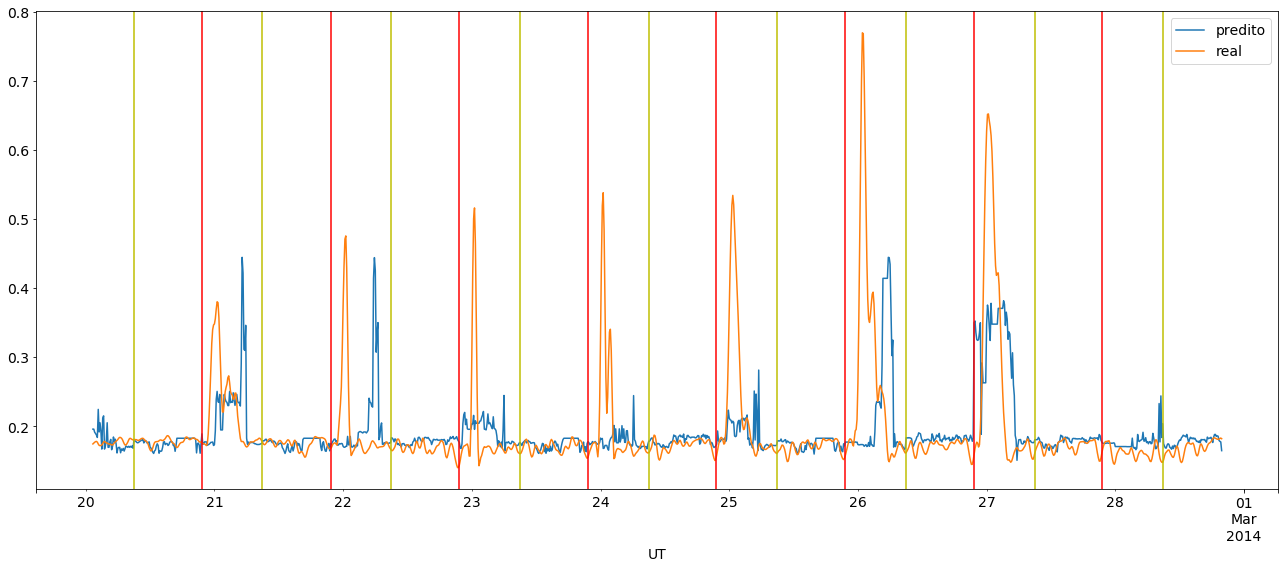

In [31]:
generate_and_avaliate_model(df, ['vtec',] + tempo + mdv1, 's4')

O erro quadrático médio foi: 0.000958
O erro quadrático total foi: 1.808571
O maior erro por previsão foi: 0.380493
O erro relativo foi: 6.168916%
O número de verdadeiros negativos foi: 2897
O número de verdadeiros positivos foi: 297
O número de falsos negativos foi: 78
O número de falsos positivos foi: 142
O POD foi: 0.792000
O FAR foi: 0.323462
A ACC foi: 0.935559
O kappa foi: 0.023006

Error for the time series sample:
O erro quadrático médio foi: 0.005179
O erro quadrático total foi: 2.558471
O maior erro por previsão foi: 0.504919
O erro relativo foi: 14.459354%
O número de verdadeiros negativos foi: 985
O número de verdadeiros positivos foi: 105
O número de falsos negativos foi: 48
O número de falsos positivos foi: 126
O POD foi: 0.686275
O FAR foi: 0.545455
A ACC foi: 0.862342
O kappa foi: 0.037873


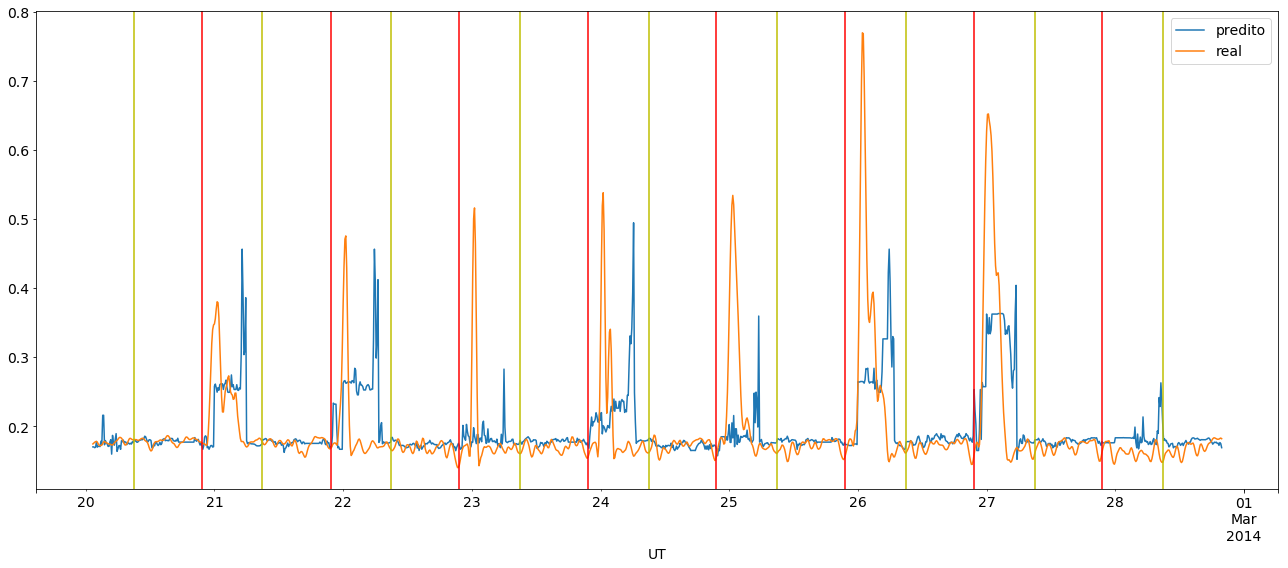

In [32]:
generate_and_avaliate_model(df, ['vtec',] + tempo + mdv2, 's4')

O erro quadrático médio foi: 0.000944
O erro quadrático total foi: 1.795513
O maior erro por previsão foi: 0.376517
O erro relativo foi: 6.016768%
O número de verdadeiros negativos foi: 2901
O número de verdadeiros positivos foi: 304
O número de falsos negativos foi: 71
O número de falsos positivos foi: 138
O POD foi: 0.810667
O FAR foi: 0.312217
A ACC foi: 0.938781
O kappa foi: 0.021271

Error for the time series sample:
O erro quadrático médio foi: 0.004945
O erro quadrático total foi: 2.500105
O maior erro por previsão foi: 0.462129
O erro relativo foi: 14.825470%
O número de verdadeiros negativos foi: 971
O número de verdadeiros positivos foi: 110
O número de falsos negativos foi: 43
O número de falsos positivos foi: 140
O POD foi: 0.718954
O FAR foi: 0.560000
A ACC foi: 0.855222
O kappa foi: 0.035772


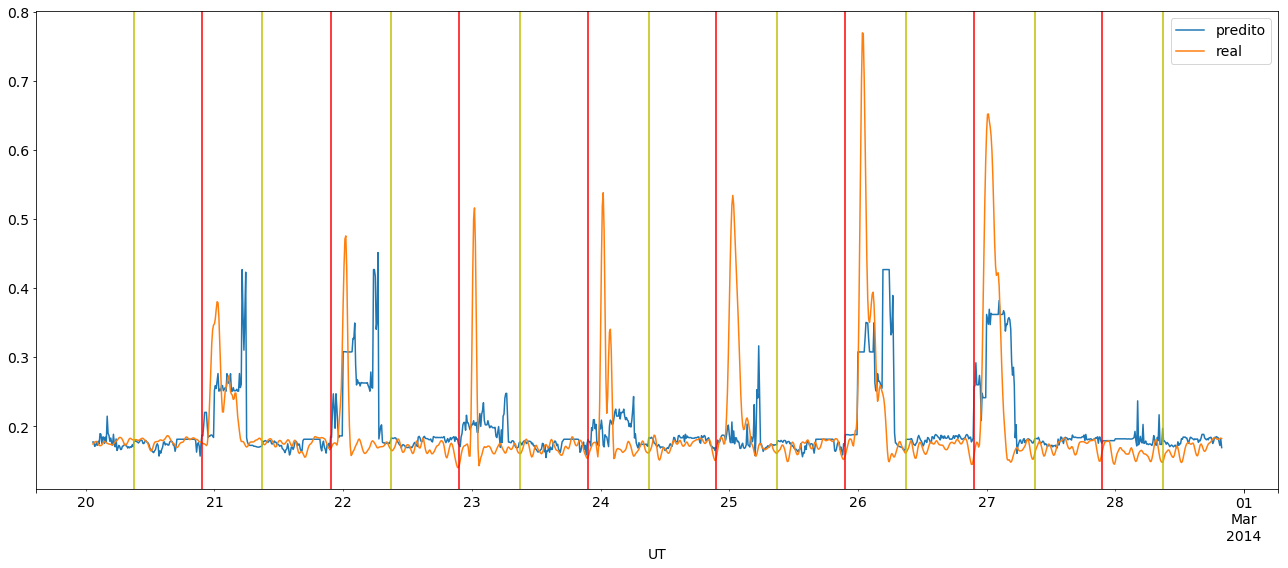

In [33]:
generate_and_avaliate_model(df, ['vtec',] + tempo + mdv1 + mdv2, 's4')

O erro quadrático médio foi: 0.001226
O erro quadrático total foi: 2.045978
O maior erro por previsão foi: 0.395411
O erro relativo foi: 7.889752%
O número de verdadeiros negativos foi: 2826
O número de verdadeiros positivos foi: 280
O número de falsos negativos foi: 95
O número de falsos positivos foi: 213
O POD foi: 0.746667
O FAR foi: 0.432049
A ACC foi: 0.909783
O kappa foi: 0.028151

Error for the time series sample:
O erro quadrático médio foi: 0.003316
O erro quadrático total foi: 2.047164
O maior erro por previsão foi: 0.436402
O erro relativo foi: 13.644795%
O número de verdadeiros negativos foi: 981
O número de verdadeiros positivos foi: 121
O número de falsos negativos foi: 32
O número de falsos positivos foi: 130
O POD foi: 0.790850
O FAR foi: 0.517928
A ACC foi: 0.871835
O kappa foi: 0.029494


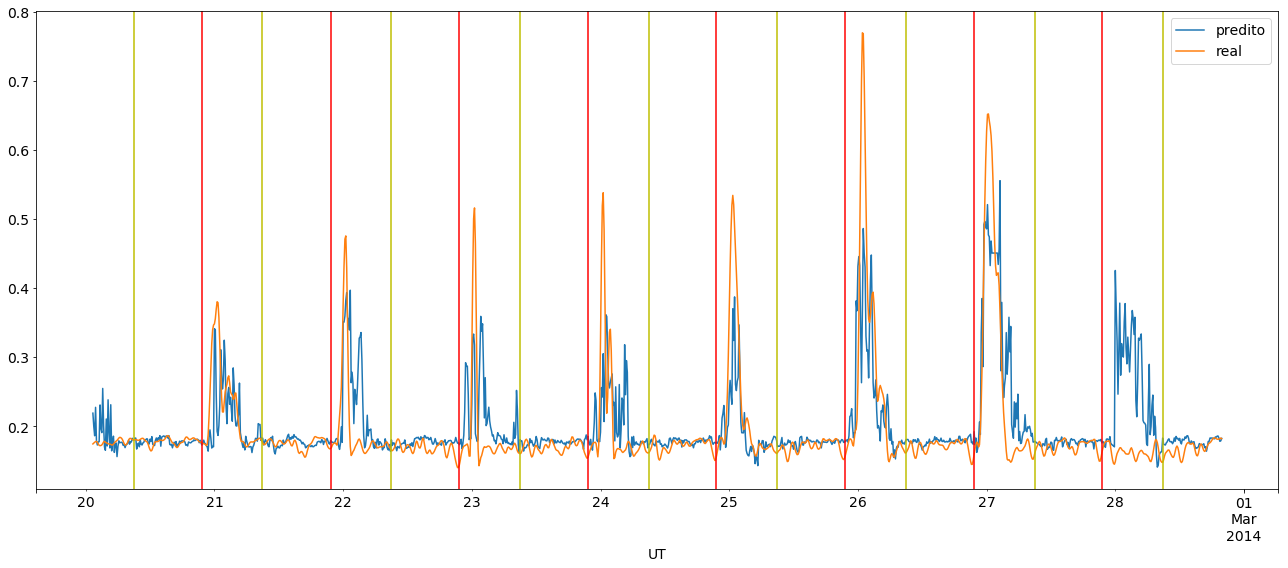

In [34]:
generate_and_avaliate_model(df, ['vtec',] + tempo + lag, 's4')

O erro quadrático médio foi: 0.000536
O erro quadrático total foi: 1.352438
O maior erro por previsão foi: 0.347644
O erro relativo foi: 4.990678%
O número de verdadeiros negativos foi: 2919
O número de verdadeiros positivos foi: 328
O número de falsos negativos foi: 47
O número de falsos positivos foi: 120
O POD foi: 0.874667
O FAR foi: 0.267857
A ACC foi: 0.951084
O kappa foi: 0.015148

Error for the time series sample:
O erro quadrático médio foi: 0.004624
O erro quadrático total foi: 2.417673
O maior erro por previsão foi: 0.567586
O erro relativo foi: 13.025179%
O número de verdadeiros negativos foi: 976
O número de verdadeiros positivos foi: 107
O número de falsos negativos foi: 46
O número de falsos positivos foi: 135
O POD foi: 0.699346
O FAR foi: 0.557851
A ACC foi: 0.856804
O kappa foi: 0.037142


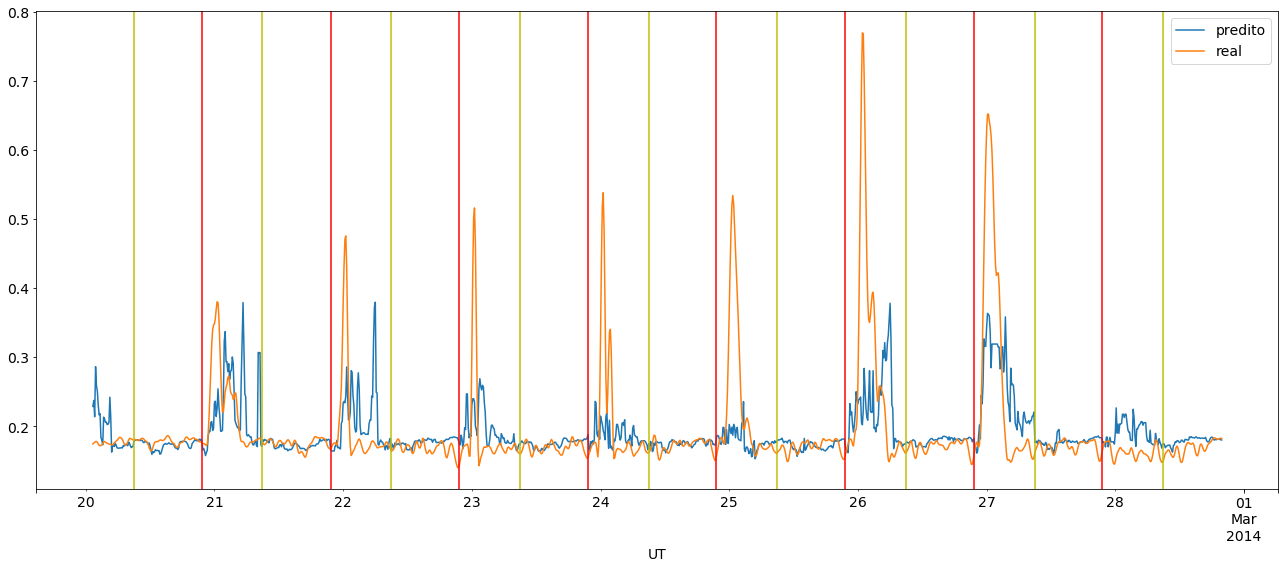

In [35]:
generate_and_avaliate_model(df, ['vtec',] + tempo + lag + mdv1, 's4')

O erro quadrático médio foi: 0.000594
O erro quadrático total foi: 1.423970
O maior erro por previsão foi: 0.364007
O erro relativo foi: 5.044271%
O número de verdadeiros negativos foi: 2916
O número de verdadeiros positivos foi: 324
O número de falsos negativos foi: 51
O número de falsos positivos foi: 123
O POD foi: 0.864000
O FAR foi: 0.275168
A ACC foi: 0.949033
O kappa foi: 0.016179

Error for the time series sample:
O erro quadrático médio foi: 0.004596
O erro quadrático total foi: 2.410374
O maior erro por previsão foi: 0.581819
O erro relativo foi: 11.947279%
O número de verdadeiros negativos foi: 1024
O número de verdadeiros positivos foi: 83
O número de falsos negativos foi: 70
O número de falsos positivos foi: 87
O POD foi: 0.542484
O FAR foi: 0.511765
A ACC foi: 0.875791
O kappa foi: 0.049384


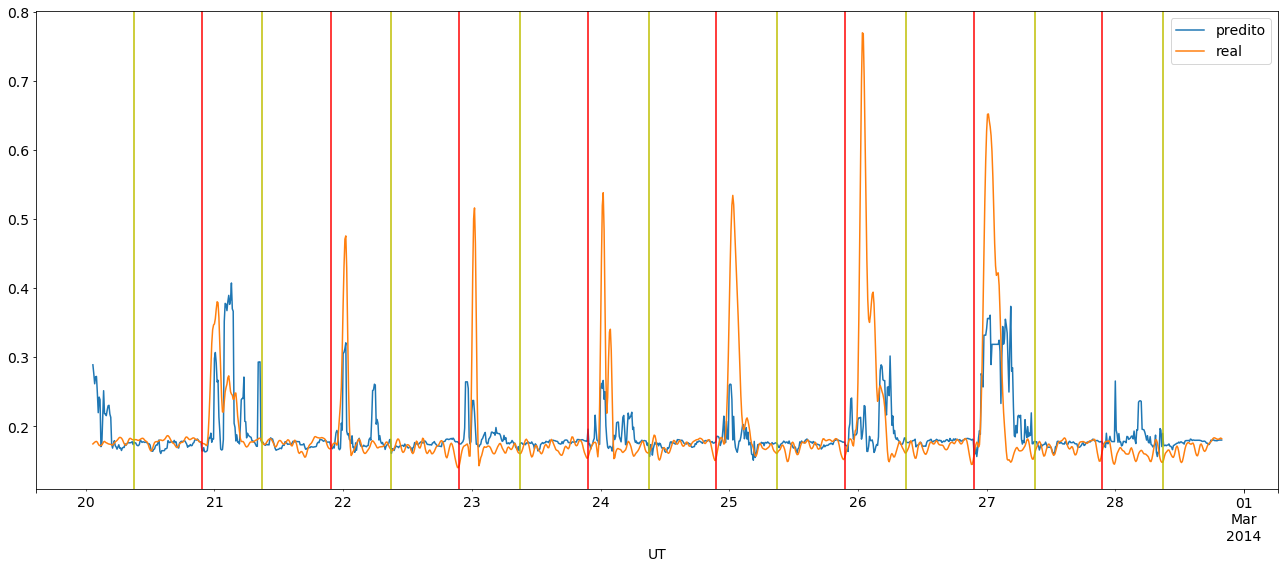

In [36]:
generate_and_avaliate_model(df, ['vtec',] + tempo + lag + mdv2, 's4')

O erro quadrático médio foi: 0.000600
O erro quadrático total foi: 1.431222
O maior erro por previsão foi: 0.329394
O erro relativo foi: 5.012907%
O número de verdadeiros negativos foi: 2908
O número de verdadeiros positivos foi: 335
O número de falsos negativos foi: 40
O número de falsos positivos foi: 131
O POD foi: 0.893333
O FAR foi: 0.281116
A ACC foi: 0.949912
O kappa foi: 0.013745

Error for the time series sample:
O erro quadrático médio foi: 0.005081
O erro quadrático total foi: 2.534236
O maior erro por previsão foi: 0.594017
O erro relativo foi: 12.660624%
O número de verdadeiros negativos foi: 997
O número de verdadeiros positivos foi: 90
O número de falsos negativos foi: 63
O número de falsos positivos foi: 114
O POD foi: 0.588235
O FAR foi: 0.558824
A ACC foi: 0.859968
O kappa foi: 0.045735


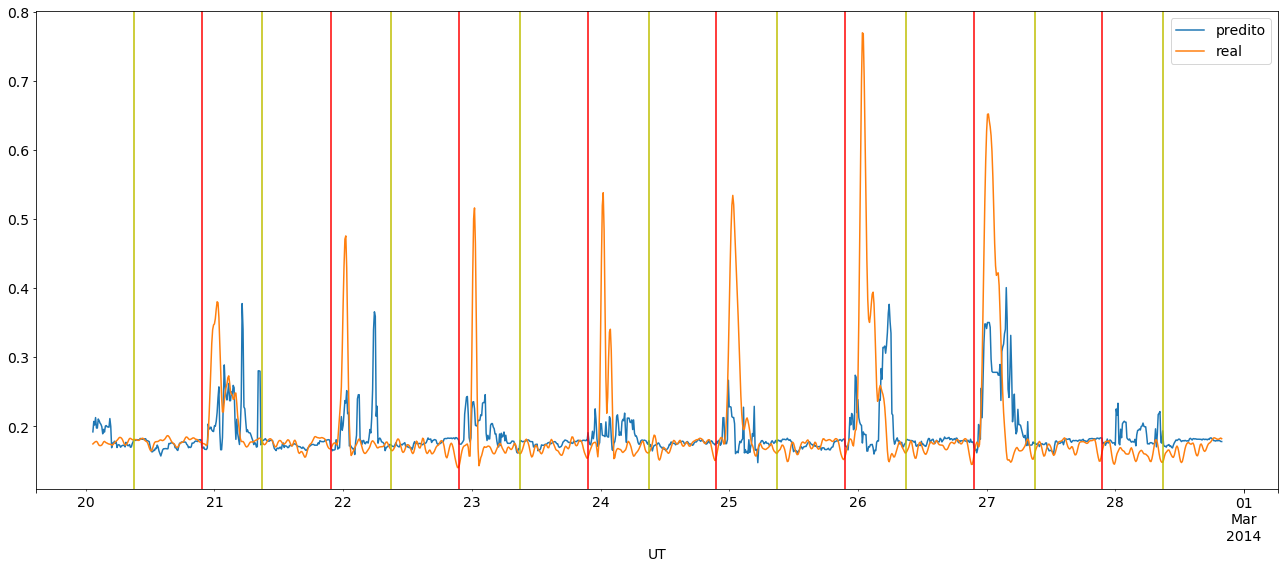

In [37]:
generate_and_avaliate_model(df, ['vtec',] + tempo + lag + mdv1 + mdv2, 's4')

O erro quadrático médio foi: 0.000609
O erro quadrático total foi: 1.441916
O maior erro por previsão foi: 0.279409
O erro relativo foi: 5.292187%
O número de verdadeiros negativos foi: 2896
O número de verdadeiros positivos foi: 319
O número de falsos negativos foi: 56
O número de falsos positivos foi: 143
O POD foi: 0.850667
O FAR foi: 0.309524
A ACC foi: 0.941711
O kappa foi: 0.017828

Error for the time series sample:
O erro quadrático médio foi: 0.003638
O erro quadrático total foi: 2.144440
O maior erro por previsão foi: 0.482858
O erro relativo foi: 12.381584%
O número de verdadeiros negativos foi: 956
O número de verdadeiros positivos foi: 125
O número de falsos negativos foi: 28
O número de falsos positivos foi: 155
O POD foi: 0.816993
O FAR foi: 0.553571
A ACC foi: 0.855222
O kappa foi: 0.028881


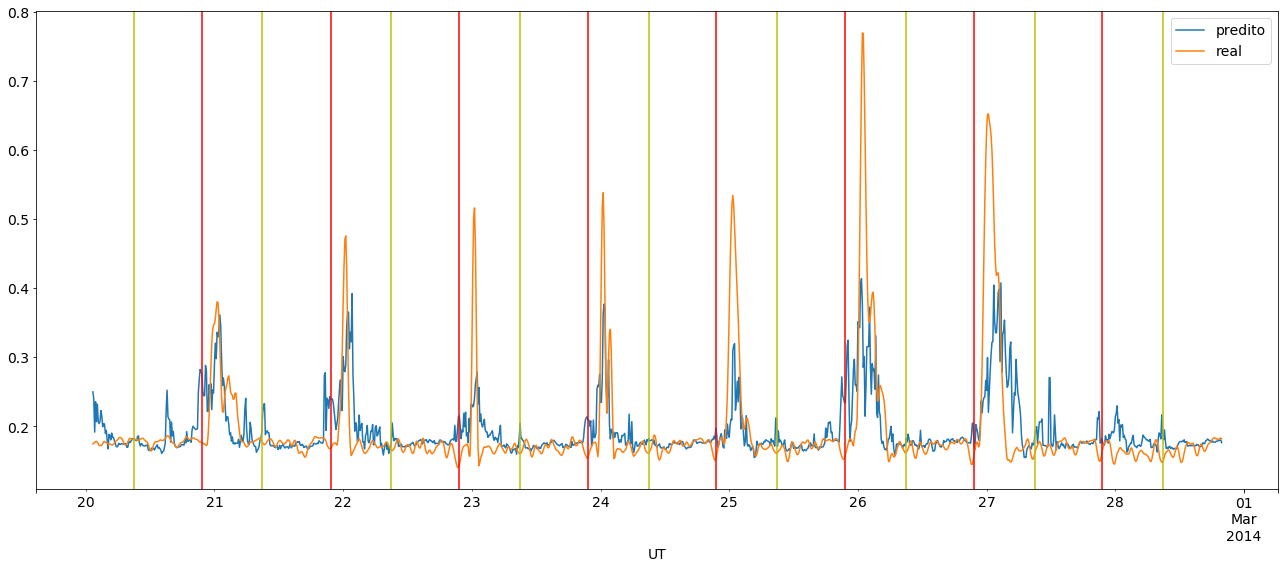

In [38]:
generate_and_avaliate_model(df, original + tempo + lag + mdv1 + mdv2, 's4')